# Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, KFold

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, cohen_kappa_score, precision_score, recall_score, f1_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import tree
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier


In [2]:
#Read/Importing data
df= pd.read_csv(r'resume.csv')

In [3]:
#To Display all the rows and columns of table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

In [4]:
#Keeping copy of file for future 
df1= df.copy()

# Data Cleaning and Preprocessing

In [5]:
#To display top 5 rows of the table
df.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,job_req_min_experience,job_req_computer,job_req_organization,job_req_school,firstname,race,gender,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality,received_callback
0,384,Chicago,manufacturing,supervisor,NaN,1,NaN,1,0,0,5,1.0,0,none_listed,Allison,white,f,4.0,1.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,1.0,0.0,low,0
1,384,Chicago,manufacturing,supervisor,NaN,1,NaN,1,0,0,5,1.0,0,none_listed,Kristen,white,f,3.0,0.0,0.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,1.0,high,0
2,384,Chicago,manufacturing,supervisor,NaN,1,NaN,1,0,0,5,1.0,0,none_listed,Lakisha,black,f,4.0,1.0,0.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,low,0
3,384,Chicago,manufacturing,supervisor,NaN,1,NaN,1,0,0,5,1.0,0,none_listed,Latonya,black,f,3.0,0.0,0.0,0.0,6.0,1.0,1.0,1.0,0.0,1.0,1.0,high,0
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,some,1.0,1,none_listed,Carrie,brown,f,3.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,0.0,1.0,high,0


In [6]:
#To display number of rows and columns
df.shape

(4882, 30)

In [7]:
#To display columns, data types, non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4882 entries, 0 to 4881
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_ad_id               4882 non-null   int64  
 1   job_city                4882 non-null   object 
 2   job_industry            4794 non-null   object 
 3   job_type                4882 non-null   object 
 4   job_fed_contractor      3109 non-null   float64
 5   job_equal_opp_employer  4882 non-null   int64  
 6   job_ownership           2885 non-null   object 
 7   job_req_any             4882 non-null   int64  
 8   job_req_communication   4882 non-null   int64  
 9   job_req_education       4882 non-null   int64  
 10  job_req_min_experience  4882 non-null   object 
 11  job_req_computer        4841 non-null   float64
 12  job_req_organization    4882 non-null   int64  
 13  job_req_school          4882 non-null   object 
 14  firstname               4882 non-null   

In [8]:
#To display data types of columns
df.dtypes

job_ad_id                   int64
job_city                   object
job_industry               object
job_type                   object
job_fed_contractor        float64
job_equal_opp_employer      int64
job_ownership              object
job_req_any                 int64
job_req_communication       int64
job_req_education           int64
job_req_min_experience     object
job_req_computer          float64
job_req_organization        int64
job_req_school             object
firstname                  object
race                       object
gender                     object
years_college             float64
college_degree            float64
honors                    float64
worked_during_school      float64
years_experience          float64
computer_skills           float64
special_skills            float64
volunteer                 float64
military                  float64
employment_holes          float64
has_email_address         float64
resume_quality             object
received_callb

In [9]:
#To display list of columns
df.columns

Index(['job_ad_id', 'job_city', 'job_industry', 'job_type',
       'job_fed_contractor', 'job_equal_opp_employer', 'job_ownership',
       'job_req_any', 'job_req_communication', 'job_req_education',
       'job_req_min_experience', 'job_req_computer', 'job_req_organization',
       'job_req_school', 'firstname', 'race', 'gender', 'years_college',
       'college_degree', 'honors', 'worked_during_school', 'years_experience',
       'computer_skills', 'special_skills', 'volunteer', 'military',
       'employment_holes', 'has_email_address', 'resume_quality',
       'received_callback'],
      dtype='object')

In [10]:
#To display number of duplicate values
df.duplicated().sum()

4

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
#To display number of missing values and treat them
df.isnull().sum()

job_ad_id                    0
job_city                     0
job_industry                88
job_type                     0
job_fed_contractor        1772
job_equal_opp_employer       0
job_ownership             1996
job_req_any                  0
job_req_communication        0
job_req_education            0
job_req_min_experience       0
job_req_computer            41
job_req_organization         0
job_req_school               0
firstname                    0
race                         0
gender                       0
years_college                2
college_degree              10
honors                      19
worked_during_school        22
years_experience            19
computer_skills             18
special_skills              17
volunteer                   18
military                    23
employment_holes             8
has_email_address            1
resume_quality               0
received_callback            0
dtype: int64

In [13]:
#To check missing values in percentage
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending = False)

job_ownership             40.918409
job_fed_contractor        36.326363
job_industry               1.804018
job_req_computer           0.840508
military                   0.471505
worked_during_school       0.451005
honors                     0.389504
years_experience           0.389504
computer_skills            0.369004
volunteer                  0.369004
special_skills             0.348503
college_degree             0.205002
employment_holes           0.164002
years_college              0.041000
has_email_address          0.020500
resume_quality             0.000000
job_ad_id                  0.000000
race                       0.000000
gender                     0.000000
job_city                   0.000000
firstname                  0.000000
job_req_school             0.000000
job_req_organization       0.000000
job_req_min_experience     0.000000
job_req_education          0.000000
job_req_communication      0.000000
job_req_any                0.000000
job_equal_opp_employer     0

In [14]:
# Dropping 'name' and 'ad_id' column as it will not affect the model performance.
# Dropping column 'job_ownership' and 'job_fed_contractor' as it is not much important and have more than 35% missing values.

df.drop(['job_ad_id','firstname', 'job_ownership','job_fed_contractor'], axis=1, inplace=True)

In [15]:
df.isnull().sum().sort_values(ascending = False)

job_industry              88
job_req_computer          41
military                  23
worked_during_school      22
years_experience          19
honors                    19
volunteer                 18
computer_skills           18
special_skills            17
college_degree            10
employment_holes           8
years_college              2
has_email_address          1
resume_quality             0
job_city                   0
gender                     0
race                       0
job_req_school             0
job_req_organization       0
job_req_min_experience     0
job_req_education          0
job_req_communication      0
job_req_any                0
job_equal_opp_employer     0
job_type                   0
received_callback          0
dtype: int64

In [16]:
null_cols= df.columns[df.isnull().any()]

In [17]:
null_cols

Index(['job_industry', 'job_req_computer', 'years_college', 'college_degree',
       'honors', 'worked_during_school', 'years_experience', 'computer_skills',
       'special_skills', 'volunteer', 'military', 'employment_holes',
       'has_email_address'],
      dtype='object')

In [18]:
#To display values and its count for columns with null values
for i in null_cols:
    print(f'Feature {i}')
    print(f'Unique Values - {df[i].nunique()}')
    print(f'Value Counts\n{df[i].value_counts()}')
    print('-'*40)

Feature job_industry
Unique Values - 6
Value Counts
other_service                    1529
business_and_personal_service    1282
wholesale_and_retail_trade       1027
finance_insurance_real_estate     409
manufacturing                     396
transportation_communication      147
Name: job_industry, dtype: int64
----------------------------------------
Feature job_req_computer
Unique Values - 2
Value Counts
0.0    2725
1.0    2112
Name: job_req_computer, dtype: int64
----------------------------------------
Feature years_college
Unique Values - 5
Value Counts
4.0    3508
3.0    1008
2.0     274
0.0      46
1.0      40
Name: years_college, dtype: int64
----------------------------------------
Feature college_degree
Unique Values - 2
Value Counts
1.0    3502
0.0    1366
Name: college_degree, dtype: int64
----------------------------------------
Feature honors
Unique Values - 2
Value Counts
0.0    4602
1.0     257
Name: honors, dtype: int64
----------------------------------------
Feature 

In [19]:
# dropping null values as replacing them will make data baised
df.dropna(axis=0, inplace=True)

In [20]:
df.isnull().sum()

job_city                  0
job_industry              0
job_type                  0
job_equal_opp_employer    0
job_req_any               0
job_req_communication     0
job_req_education         0
job_req_min_experience    0
job_req_computer          0
job_req_organization      0
job_req_school            0
race                      0
gender                    0
years_college             0
college_degree            0
honors                    0
worked_during_school      0
years_experience          0
computer_skills           0
special_skills            0
volunteer                 0
military                  0
employment_holes          0
has_email_address         0
resume_quality            0
received_callback         0
dtype: int64

In [21]:
#To display columns that are numeric and categorical
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['job_city', 'job_industry', 'job_type', 'job_req_min_experience',
       'job_req_school', 'race', 'gender', 'resume_quality'],
      dtype='object')
Index(['job_equal_opp_employer', 'job_req_any', 'job_req_communication',
       'job_req_education', 'job_req_computer', 'job_req_organization',
       'years_college', 'college_degree', 'honors', 'worked_during_school',
       'years_experience', 'computer_skills', 'special_skills', 'volunteer',
       'military', 'employment_holes', 'has_email_address',
       'received_callback'],
      dtype='object')


In [22]:
#To display values and its count for categorical columns
for i in cat_cols:
    print(f'Feature {i}')
    print(f'Unique Values - {df[i].nunique()}')
    print(f'Value Counts\n{df[i].value_counts()}')
    print('-'*40)

Feature job_city
Unique Values - 2
Value Counts
Chicago    2548
Boston     2064
Name: job_city, dtype: int64
----------------------------------------
Feature job_industry
Unique Values - 6
Value Counts
other_service                    1461
business_and_personal_service    1239
wholesale_and_retail_trade        990
finance_insurance_real_estate     397
manufacturing                     384
transportation_communication      141
Name: job_industry, dtype: int64
----------------------------------------
Feature job_type
Unique Values - 6
Value Counts
secretary       1526
retail_sales     788
sales_rep        703
manager          696
clerical         547
supervisor       352
Name: job_type, dtype: int64
----------------------------------------
Feature job_req_min_experience
Unique Values - 13
Value Counts
some    1016
3        559
2        552
5        406
1        349
7        280
10       256
6        251
8        242
0        241
4        231
9        222
0.5        7
Name: job_req_min_ex

In [23]:
#To display values and its count for numeric columns
for i in num_cols:
    print(f'Feature {i}')
    print(f'Unique Values - {df[i].nunique()}')
    print(f'Value Counts\n{df[i].value_counts()}')
    print('-'*40)

Feature job_equal_opp_employer
Unique Values - 2
Value Counts
0    3271
1    1341
Name: job_equal_opp_employer, dtype: int64
----------------------------------------
Feature job_req_any
Unique Values - 2
Value Counts
1    3629
0     983
Name: job_req_any, dtype: int64
----------------------------------------
Feature job_req_communication
Unique Values - 2
Value Counts
0    4032
1     580
Name: job_req_communication, dtype: int64
----------------------------------------
Feature job_req_education
Unique Values - 2
Value Counts
0    4127
1     485
Name: job_req_education, dtype: int64
----------------------------------------
Feature job_req_computer
Unique Values - 2
Value Counts
0.0    2607
1.0    2005
Name: job_req_computer, dtype: int64
----------------------------------------
Feature job_req_organization
Unique Values - 2
Value Counts
0    4274
1     338
Name: job_req_organization, dtype: int64
----------------------------------------
Feature years_college
Unique Values - 5
Value Coun

In [24]:
# 'job_req_min_experience' column has 1016 'some' values. Replacing it evenly with 0,1 and 2.
distribute= 1016//3
index_value = df.index[df['job_req_min_experience'] == 'some']

df.loc[index_value[:distribute+1], 'job_req_min_experience'] = 0
df.loc[index_value[distribute+1:distribute*2+1], 'job_req_min_experience'] = 1
df.loc[index_value[distribute*2+1:], 'job_req_min_experience'] = 2

In [25]:
df['job_req_min_experience'].value_counts()

3      559
2      552
5      406
1      349
0      339
2      339
1      338
7      280
10     256
6      251
8      242
0      241
4      231
9      222
0.5      7
Name: job_req_min_experience, dtype: int64

In [26]:
df['job_req_min_experience']=df['job_req_min_experience'].astype(float)

# EDA - Exploratory Data Analysis

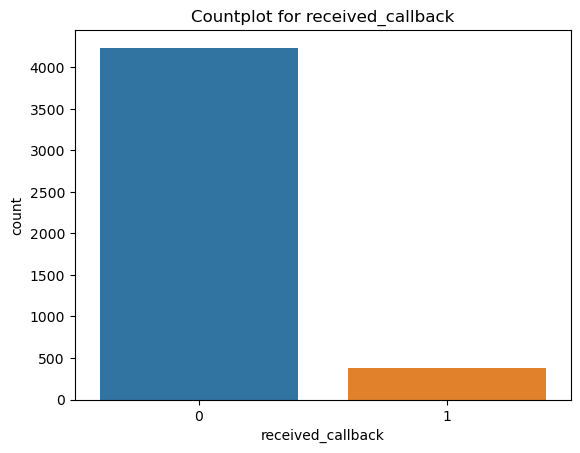

In [27]:
#To display countplot of target variable
sns.countplot(x=df['received_callback'])
plt.title('Countplot for received_callback')
plt.savefig('received_callback.png')
plt.show()

In [28]:
df['received_callback'].value_counts(normalize=True)*100

0    91.825672
1     8.174328
Name: received_callback, dtype: float64

In [29]:
#To display basic statistical values for numeric columns
df.describe()

,job_equal_opp_employer,job_req_any,job_req_communication,job_req_education,job_req_min_experience,job_req_computer,job_req_organization,years_college,college_degree,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,received_callback
count,4612.000000,4612.00000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,0.290763,0.78686,0.125759,0.105160,3.699805,0.434735,0.073287,3.618170,0.719211,0.052905,0.559627,7.862966,0.820685,0.327840,0.411969,0.098439,0.445794,0.481136,0.081743
std,0.454164,0.40957,0.331613,0.306793,3.011729,0.495776,0.260635,0.716718,0.449433,0.223869,0.496486,5.056081,0.383657,0.469477,0.492243,0.297939,0.497107,0.499698,0.274003
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.00000,0.000000,0.000000,3.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.00000,0.000000,0.000000,6.000000,1.000000,0.000000,4.000000,1.000000,0.000000,1.000000,9.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.00000,1.000000,1.000000,10.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,44.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
print(cat_cols)
print(num_cols)

Index(['job_city', 'job_industry', 'job_type', 'job_req_min_experience',
       'job_req_school', 'race', 'gender', 'resume_quality'],
      dtype='object')
Index(['job_equal_opp_employer', 'job_req_any', 'job_req_communication',
       'job_req_education', 'job_req_computer', 'job_req_organization',
       'years_college', 'college_degree', 'honors', 'worked_during_school',
       'years_experience', 'computer_skills', 'special_skills', 'volunteer',
       'military', 'employment_holes', 'has_email_address',
       'received_callback'],
      dtype='object')


In [31]:
# EDA with reference to Job.

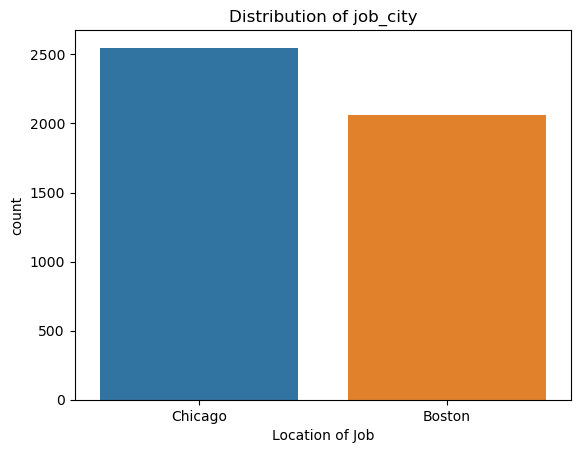

In [32]:
sns.countplot(df['job_city'])
plt.title('Distribution of job_city')
plt.xlabel('Location of Job')
plt.savefig('job_city.png')
plt.show()

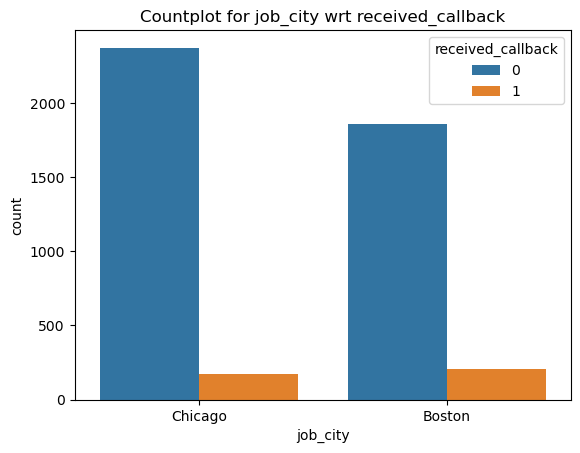

In [33]:
sns.countplot(x=df['job_city'],hue=df['received_callback'])
plt.title(f'Countplot for job_city wrt received_callback')
plt.savefig('job_city_received_callback.png')
plt.show()

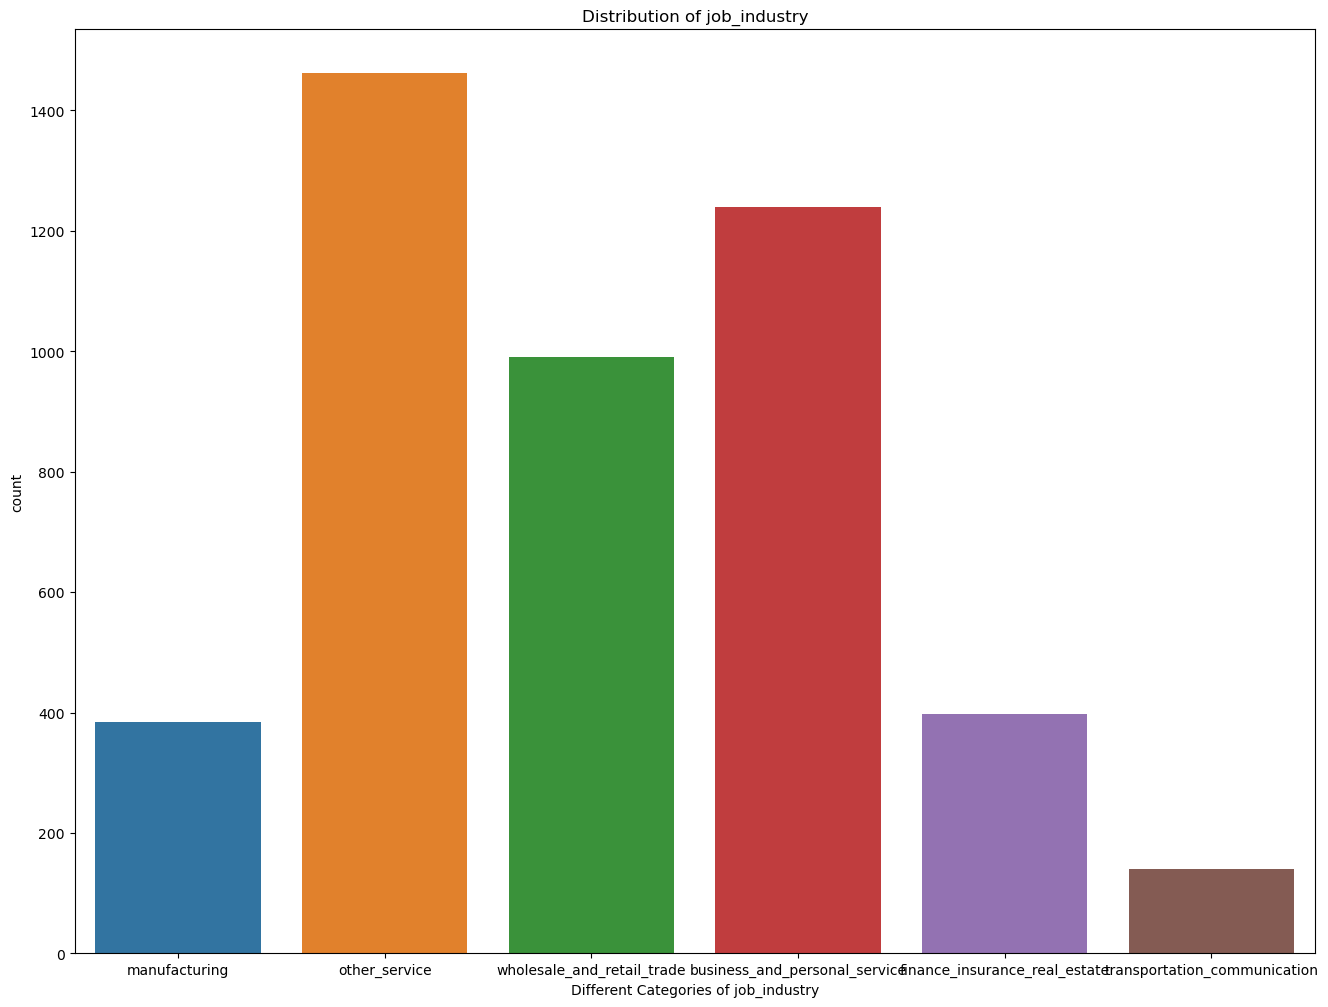

In [34]:
plt.figure(figsize=(16, 12))
sns.countplot(df['job_industry'])
plt.title('Distribution of job_industry')
plt.xlabel('Different Categories of job_industry')
plt.savefig('job_industry.png')
plt.show()

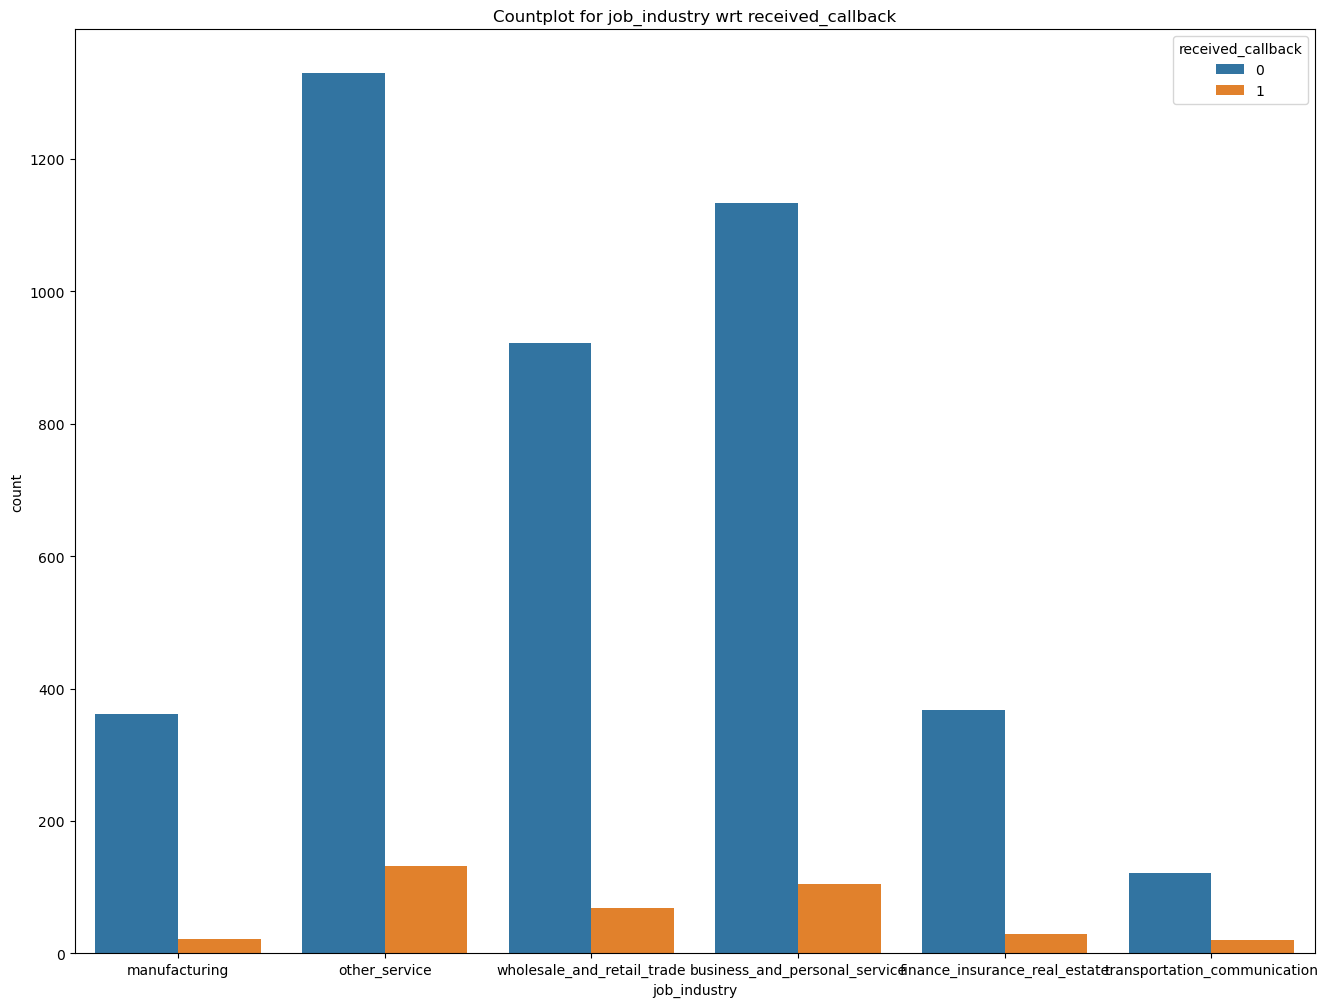

In [35]:
plt.figure(figsize=(16, 12))
sns.countplot(x=df['job_industry'],hue=df['received_callback'])
plt.title(f'Countplot for job_industry wrt received_callback')
plt.savefig('job_city_received_callback.png')
plt.show()

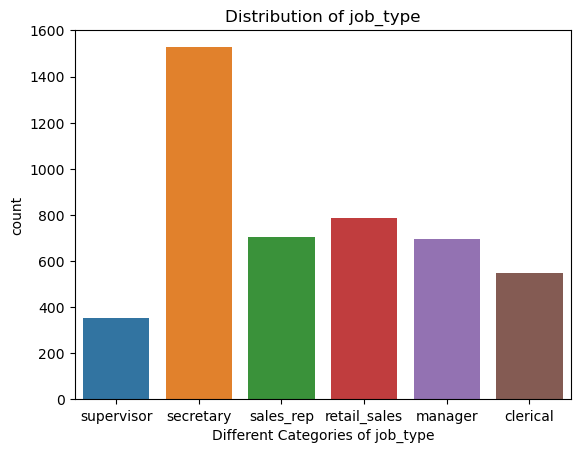

In [36]:
sns.countplot(df['job_type'])
plt.title('Distribution of job_type')
plt.xlabel('Different Categories of job_type')
plt.savefig('job_type.png')
plt.show()

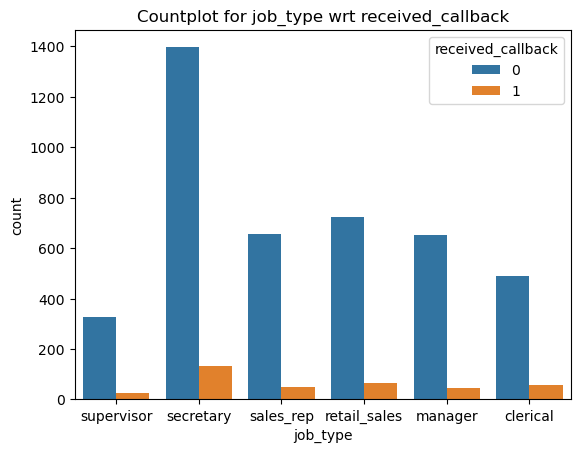

In [37]:
sns.countplot(x=df['job_type'],hue=df['received_callback'])
plt.title(f'Countplot for job_type wrt received_callback')
plt.savefig('job_city_received_callback.png')
plt.show()

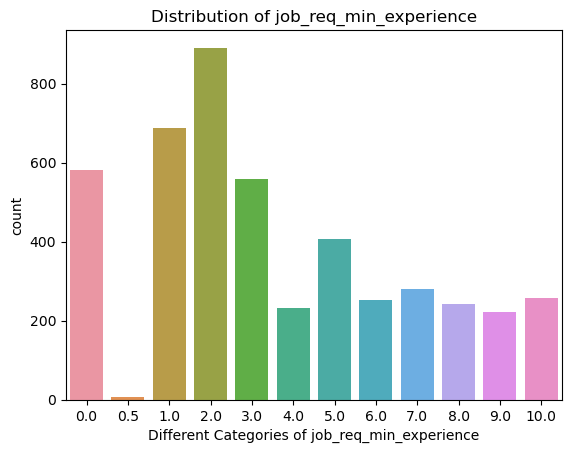

In [38]:
sns.countplot(df['job_req_min_experience'])
plt.title('Distribution of job_req_min_experience')
plt.xlabel('Different Categories of job_req_min_experience')
plt.savefig('job_req_min_experience.png')
plt.show()

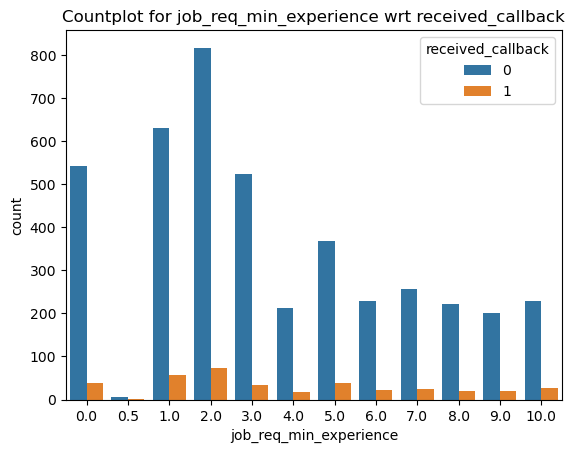

In [39]:
sns.countplot(x=df['job_req_min_experience'],hue=df['received_callback'])
plt.title(f'Countplot for job_req_min_experience wrt received_callback')
plt.savefig('job_city_received_callback.png')
plt.show()

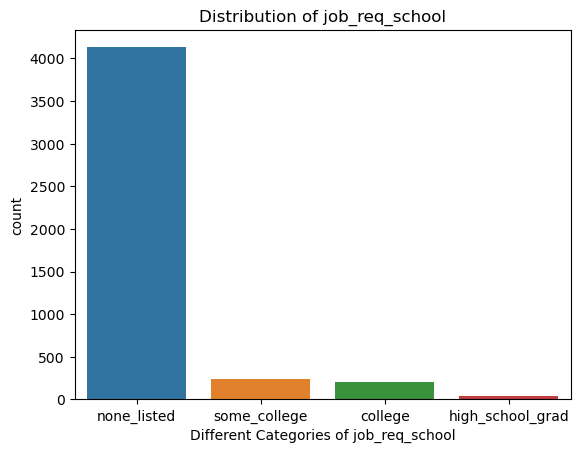

In [40]:
sns.countplot(df['job_req_school'])
plt.title('Distribution of job_req_school')
plt.xlabel('Different Categories of job_req_school')
plt.savefig('job_req_school.png')
plt.show()

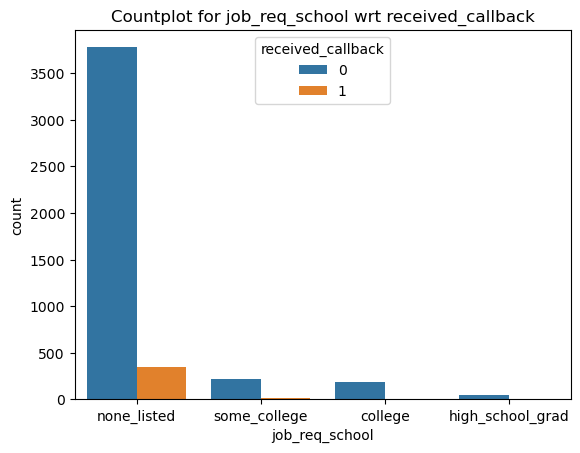

In [41]:
sns.countplot(x=df['job_req_school'],hue=df['received_callback'])
plt.title(f'Countplot for job_req_school wrt received_callback')
plt.savefig('job_city_received_callback.png')
plt.show()

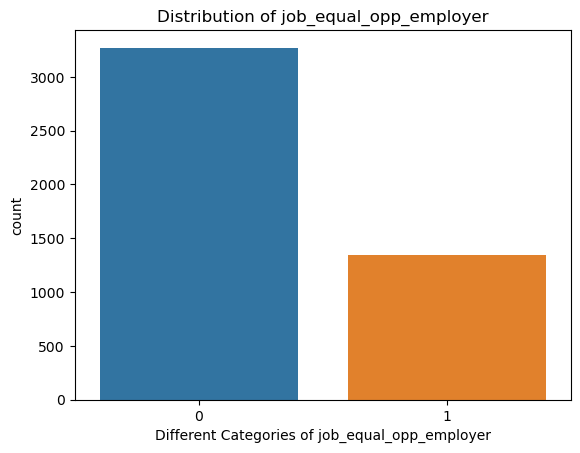

In [42]:
sns.countplot(df['job_equal_opp_employer'])
plt.title('Distribution of job_equal_opp_employer')
plt.xlabel('Different Categories of job_equal_opp_employer')
plt.savefig('job_equal_opp_employer.png')
plt.show()

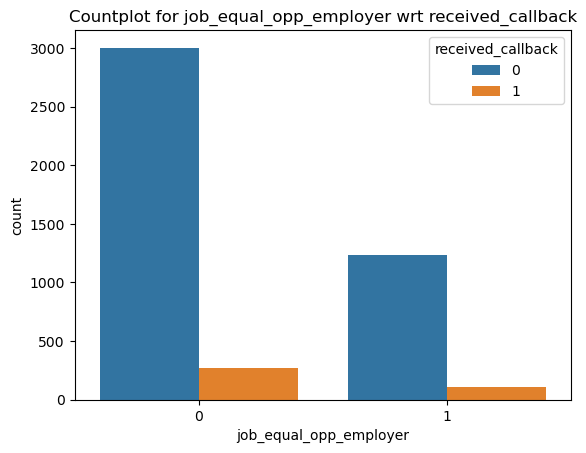

In [43]:
sns.countplot(x=df['job_equal_opp_employer'],hue=df['received_callback'])
plt.title(f'Countplot for job_equal_opp_employer wrt received_callback')
plt.savefig('job_equal_opp_employer_received_callback.png')
plt.show()

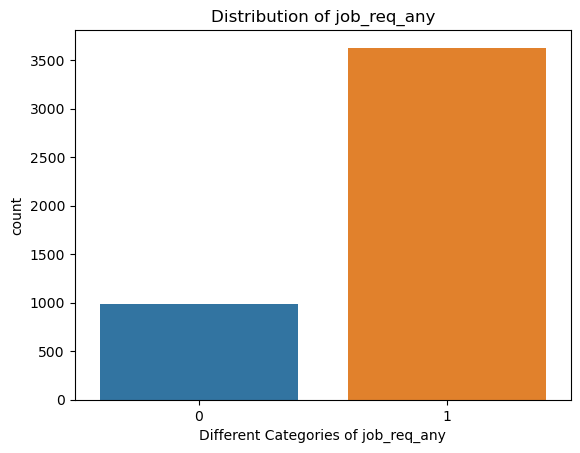

In [44]:
sns.countplot(df['job_req_any'])
plt.title('Distribution of job_req_any')
plt.xlabel('Different Categories of job_req_any')
plt.savefig('job_req_any.png')
plt.show()

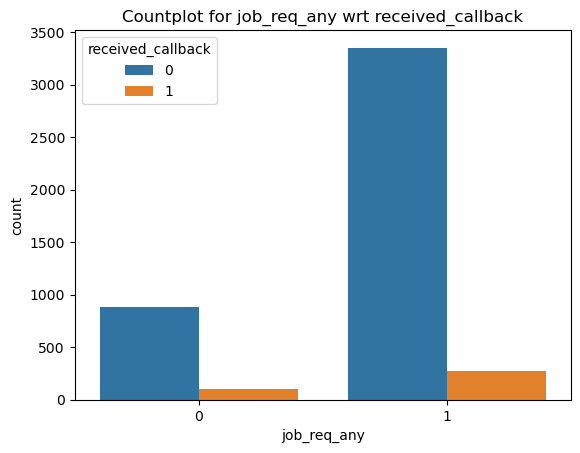

In [45]:
sns.countplot(x=df['job_req_any'],hue=df['received_callback'])
plt.title(f'Countplot for job_req_any wrt received_callback')
plt.savefig('job_req_any_employer_received_callback.png')
plt.show()

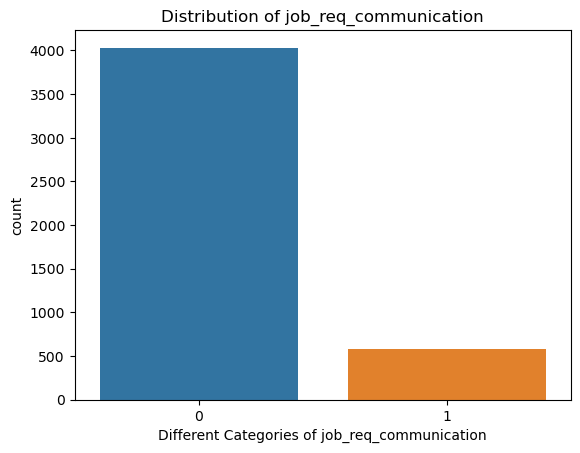

In [46]:
sns.countplot(df['job_req_communication'])
plt.title('Distribution of job_req_communication')
plt.xlabel('Different Categories of job_req_communication')
plt.savefig('job_req_communication.png')
plt.show()

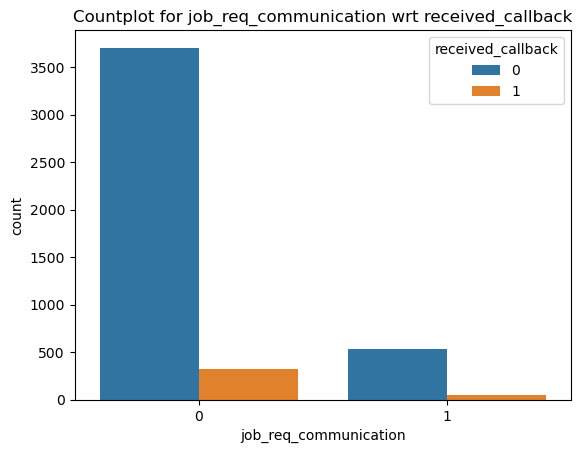

In [47]:
sns.countplot(x=df['job_req_communication'],hue=df['received_callback'])
plt.title(f'Countplot for job_req_communication wrt received_callback')
plt.savefig('job_req_communication_employer_received_callback.png')
plt.show()

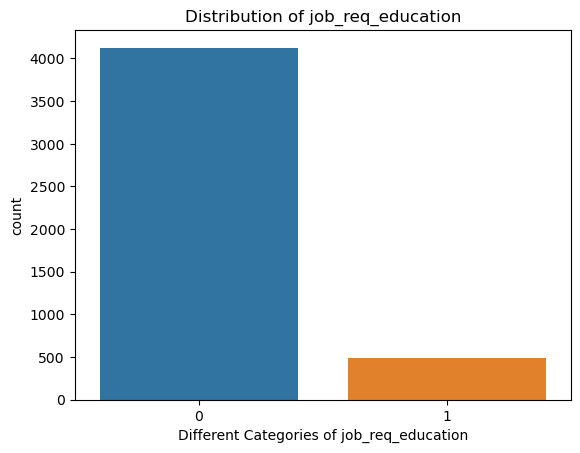

In [48]:
sns.countplot(df['job_req_education'])
plt.title('Distribution of job_req_education')
plt.xlabel('Different Categories of job_req_education')
plt.savefig('job_req_education.png')
plt.show()

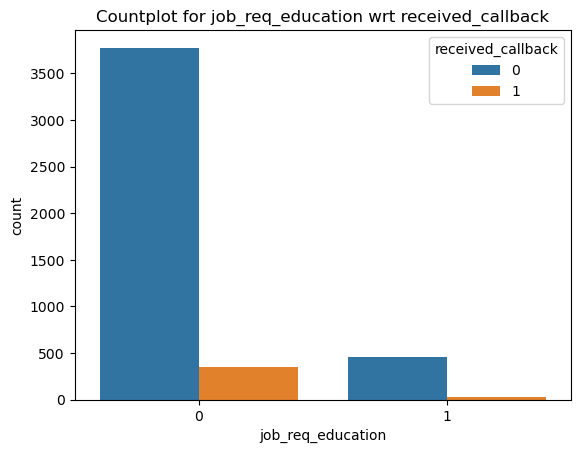

In [49]:
sns.countplot(x=df['job_req_education'],hue=df['received_callback'])
plt.title(f'Countplot for job_req_education wrt received_callback')
plt.savefig('job_req_education_employer_received_callback.png')
plt.show()

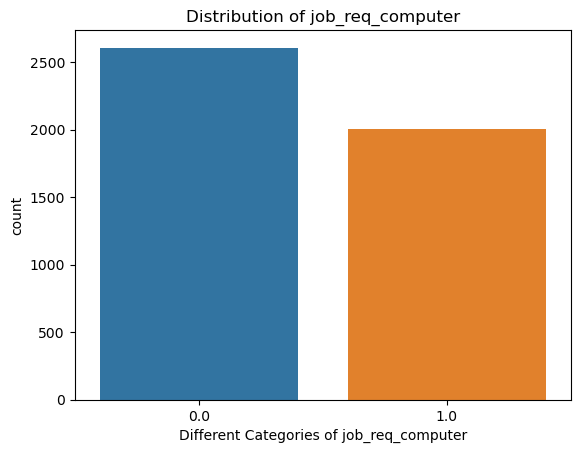

In [50]:
sns.countplot(df['job_req_computer'])
plt.title('Distribution of job_req_computer')
plt.xlabel('Different Categories of job_req_computer')
plt.savefig('job_req_computer.png')
plt.show()

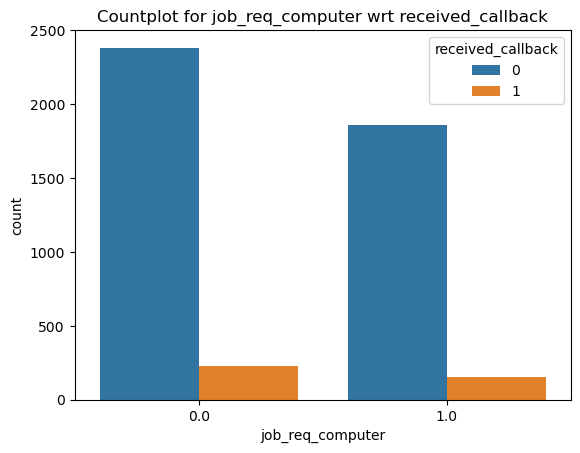

In [51]:
sns.countplot(x=df['job_req_computer'],hue=df['received_callback'])
plt.title(f'Countplot for job_req_computer wrt received_callback')
plt.savefig('job_req_computer_employer_received_callback.png')
plt.show()

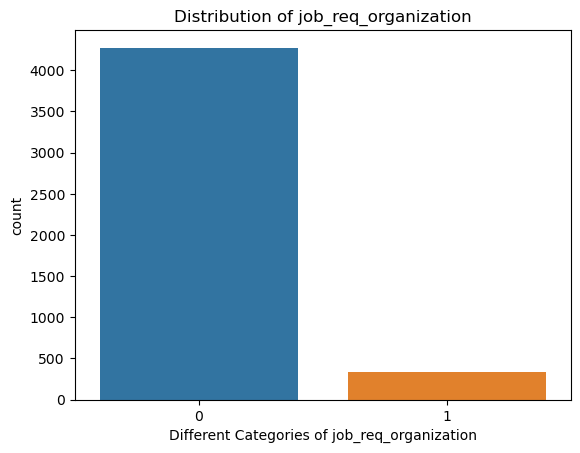

In [52]:
sns.countplot(df['job_req_organization'])
plt.title('Distribution of job_req_organization')
plt.xlabel('Different Categories of job_req_organization')
plt.savefig('job_req_organization.png')
plt.show()

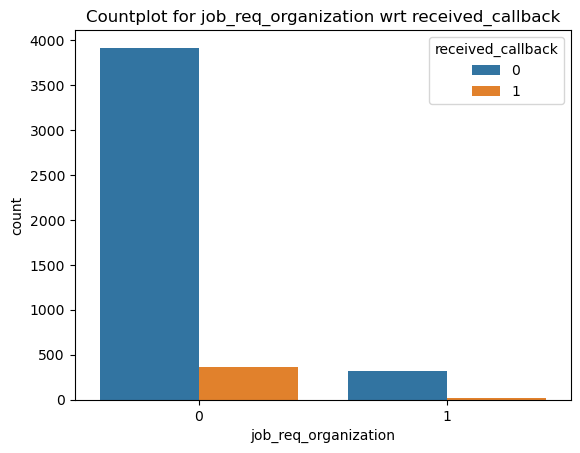

In [53]:
sns.countplot(x=df['job_req_organization'],hue=df['received_callback'])
plt.title(f'Countplot for job_req_organization wrt received_callback')
plt.savefig('job_req_organization_employer_received_callback.png')
plt.show()

In [54]:
# EDA with reference to Applicants.

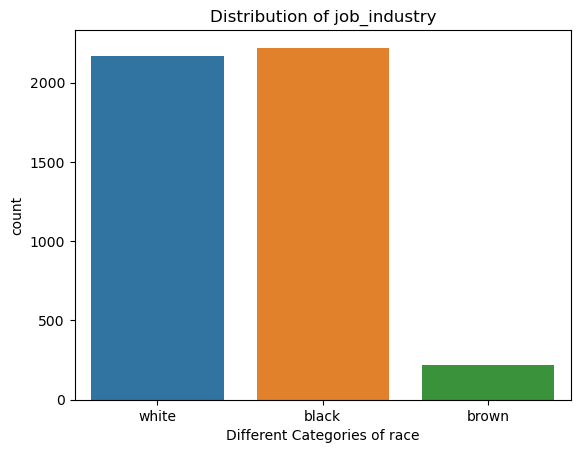

In [55]:
sns.countplot(df['race'])
plt.title('Distribution of job_industry')
plt.xlabel('Different Categories of race')
plt.savefig('race.png')
plt.show()

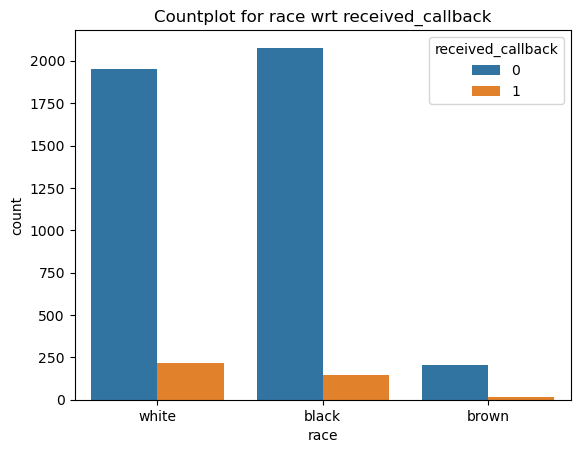

In [56]:
sns.countplot(x=df['race'],hue=df['received_callback'])
plt.title(f'Countplot for race wrt received_callback')
plt.savefig('race_received_callback.png')
plt.show()

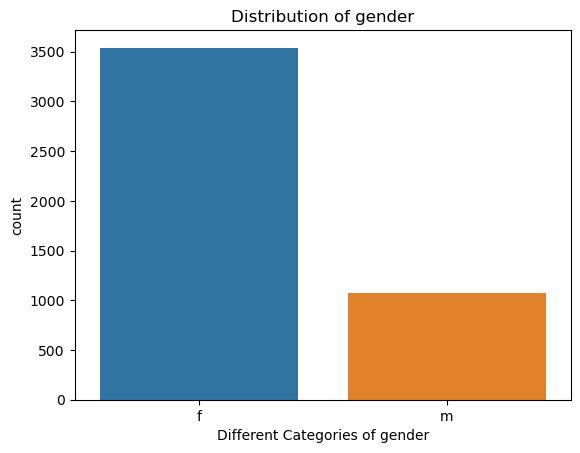

In [57]:
sns.countplot(df['gender'])
plt.title('Distribution of gender')
plt.xlabel('Different Categories of gender')
plt.savefig('gender.png')
plt.show()

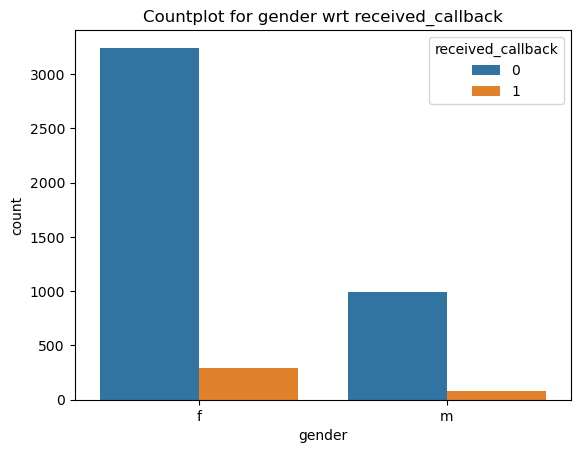

In [58]:
sns.countplot(x=df['gender'],hue=df['received_callback'])
plt.title(f'Countplot for gender wrt received_callback')
plt.savefig('job_city_received_callback.png')
plt.show()

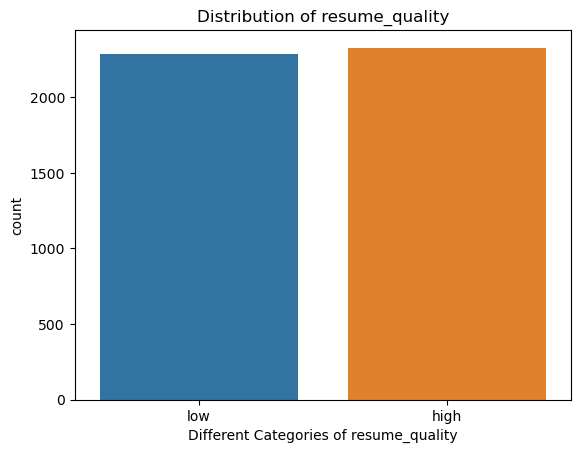

In [59]:
sns.countplot(df['resume_quality'])
plt.title('Distribution of resume_quality')
plt.xlabel('Different Categories of resume_quality')
plt.savefig('resume_quality.png')
plt.show()

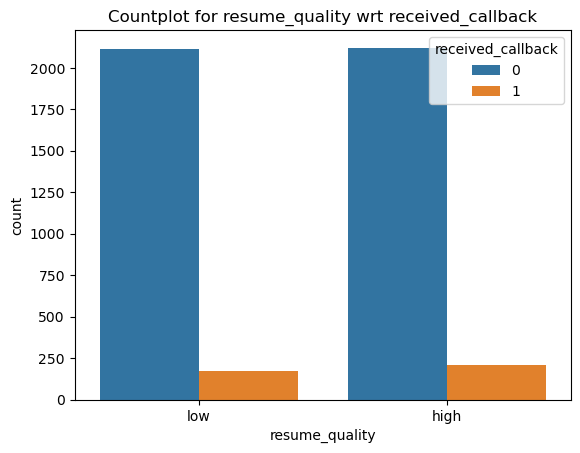

In [60]:
sns.countplot(x=df['resume_quality'],hue=df['received_callback'])
plt.title(f'Countplot for resume_quality wrt received_callback')
plt.savefig('job_city_received_callback.png')
plt.show()

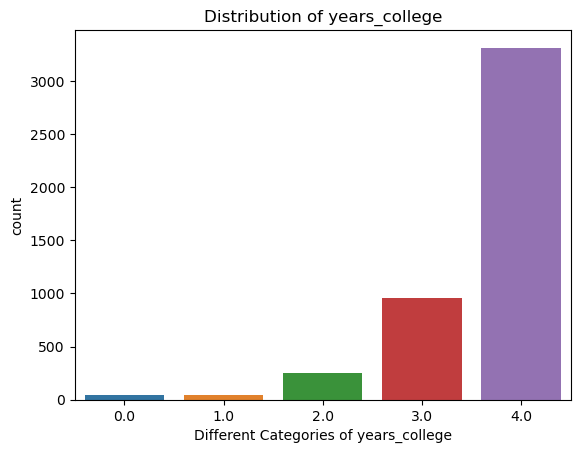

In [61]:
sns.countplot(df['years_college'])
plt.title('Distribution of years_college')
plt.xlabel('Different Categories of years_college')
plt.savefig('years_college.png')
plt.show()

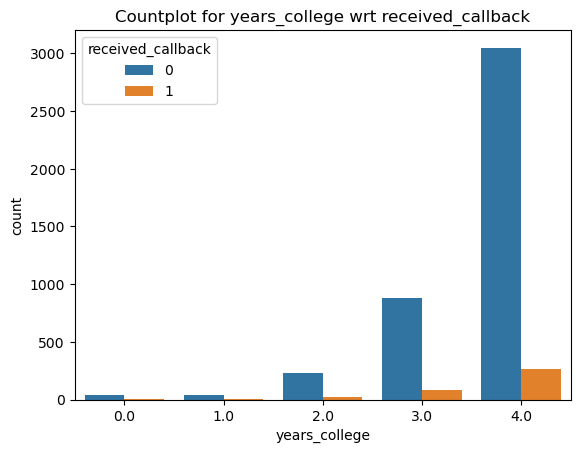

In [62]:
sns.countplot(x=df['years_college'],hue=df['received_callback'])
plt.title(f'Countplot for years_college wrt received_callback')
plt.savefig('years_college_employer_received_callback.png')
plt.show()

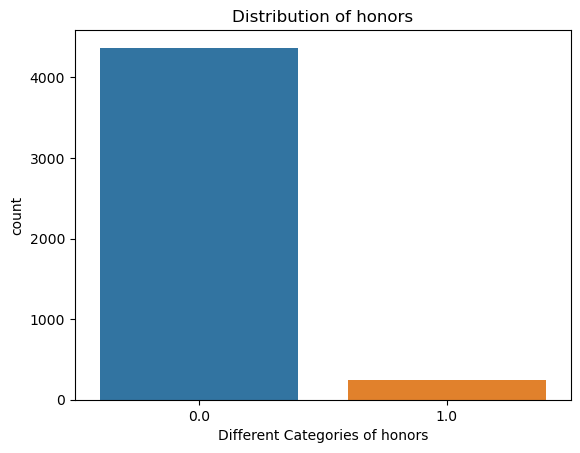

In [63]:
sns.countplot(df['honors'])
plt.title('Distribution of honors')
plt.xlabel('Different Categories of honors')
plt.savefig('honors.png')
plt.show()

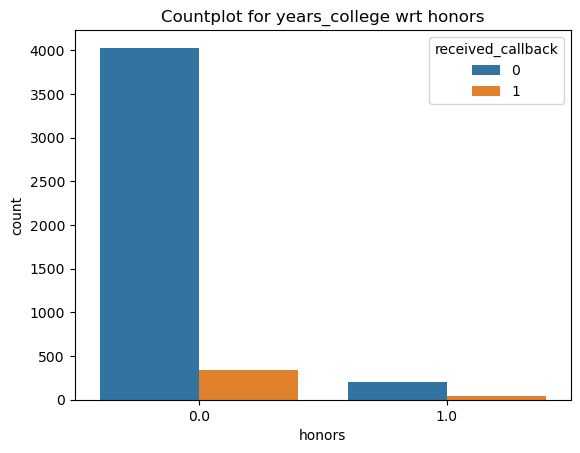

In [64]:
sns.countplot(x=df['honors'],hue=df['received_callback'])
plt.title(f'Countplot for years_college wrt honors')
plt.savefig('honors_employer_received_callback.png')
plt.show()

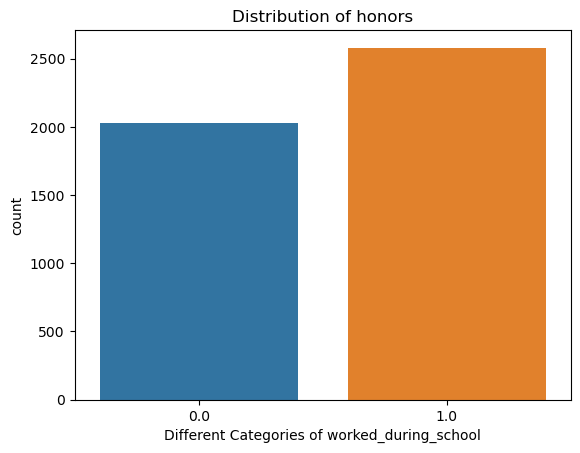

In [65]:
sns.countplot(df['worked_during_school'])
plt.title('Distribution of honors')
plt.xlabel('Different Categories of worked_during_school')
plt.savefig('worked_during_school.png')
plt.show()

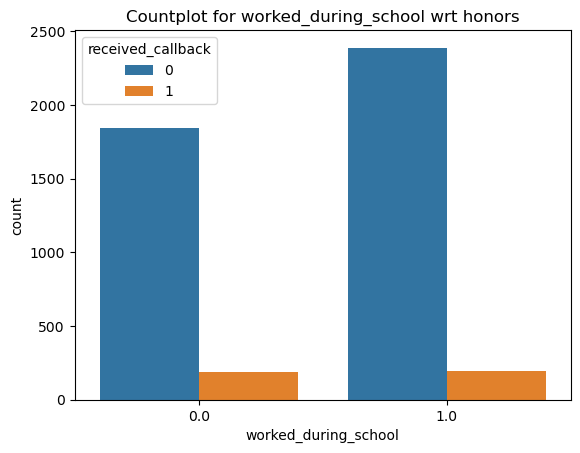

In [66]:
sns.countplot(x=df['worked_during_school'],hue=df['received_callback'])
plt.title(f'Countplot for worked_during_school wrt honors')
plt.savefig('worked_during_school_received_callback.png')
plt.show()

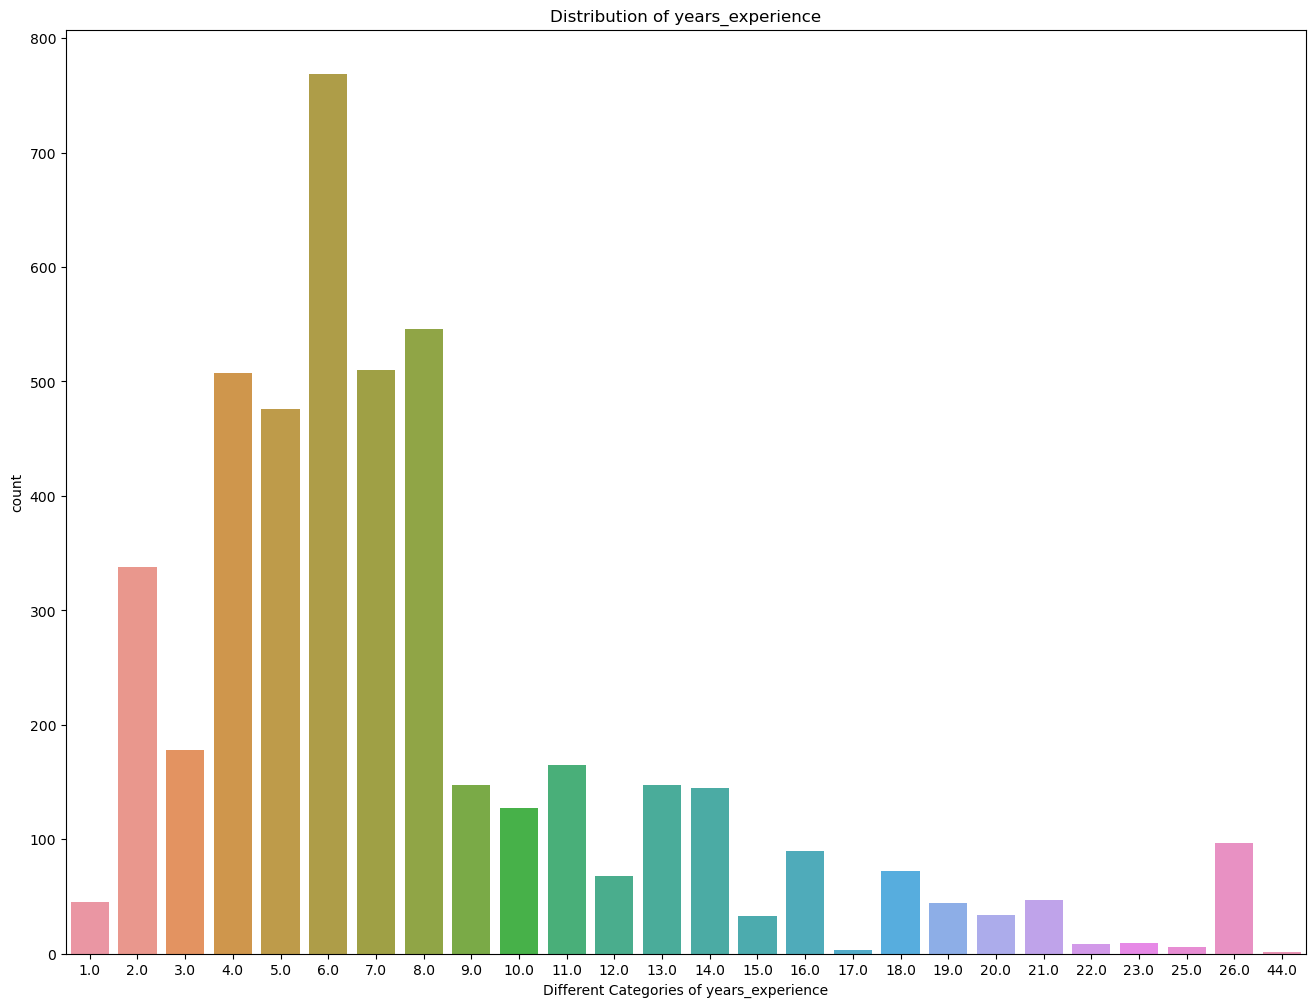

In [67]:
plt.figure(figsize=(16,12))
sns.countplot(df['years_experience'])
plt.title('Distribution of years_experience')
plt.xlabel('Different Categories of years_experience')
plt.savefig('years_experience.png')
plt.show()

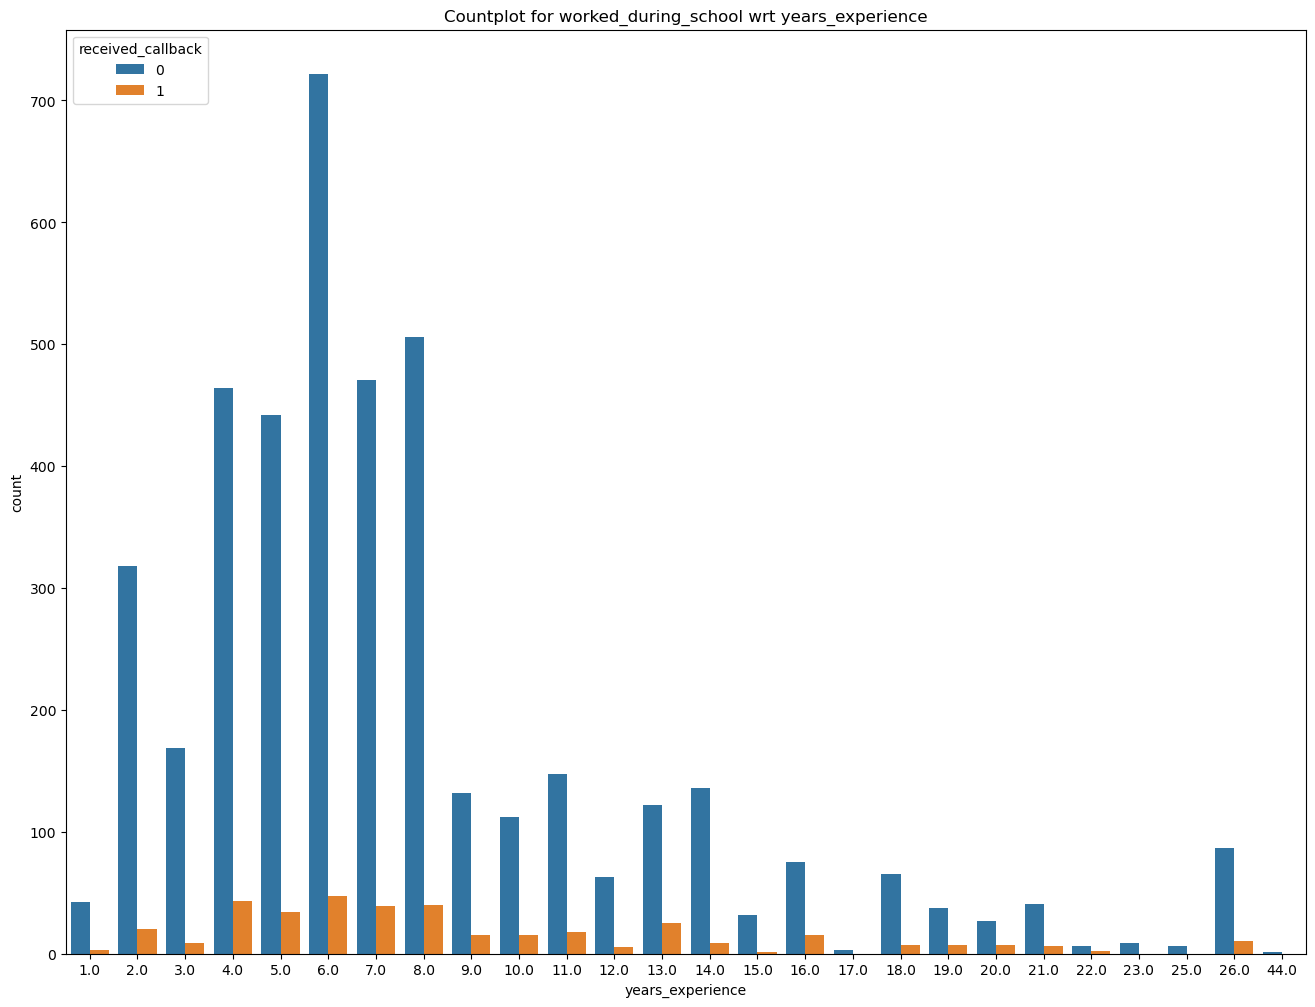

In [68]:
plt.figure(figsize=(16, 12))
sns.countplot(x=df['years_experience'],hue=df['received_callback'])
plt.title(f'Countplot for worked_during_school wrt years_experience')
plt.savefig('years_experience_received_callback.png')
plt.show()

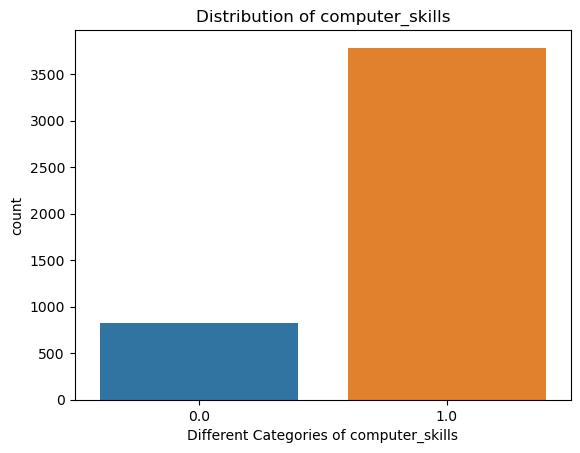

In [69]:
sns.countplot(df['computer_skills'])
plt.title('Distribution of computer_skills')
plt.xlabel('Different Categories of computer_skills')
plt.savefig('computer_skills.png')
plt.show()

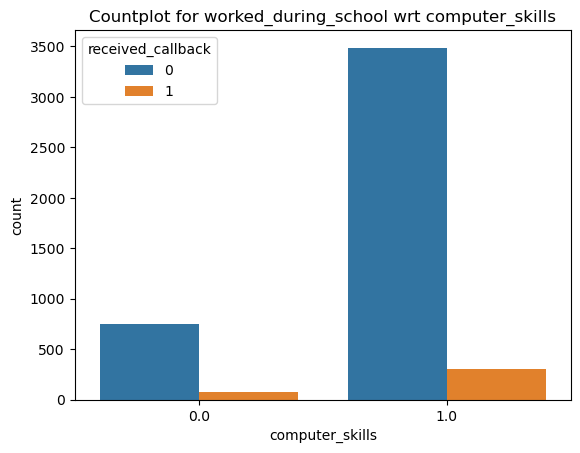

In [70]:
sns.countplot(x=df['computer_skills'],hue=df['received_callback'])
plt.title(f'Countplot for worked_during_school wrt computer_skills')
plt.savefig('computer_skills_received_callback.png')
plt.show()

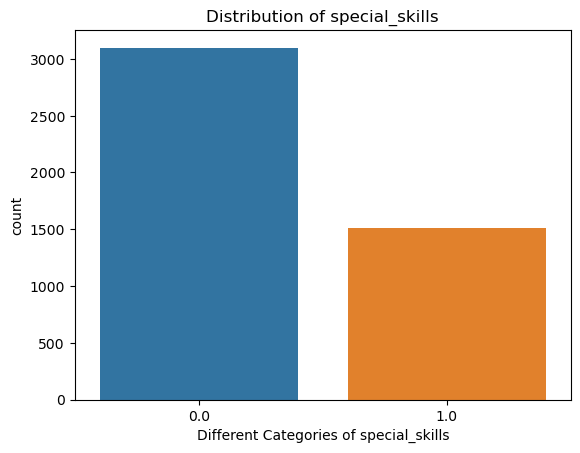

In [71]:
sns.countplot(df['special_skills'])
plt.title('Distribution of special_skills')
plt.xlabel('Different Categories of special_skills')
plt.savefig('special_skills.png')
plt.show()

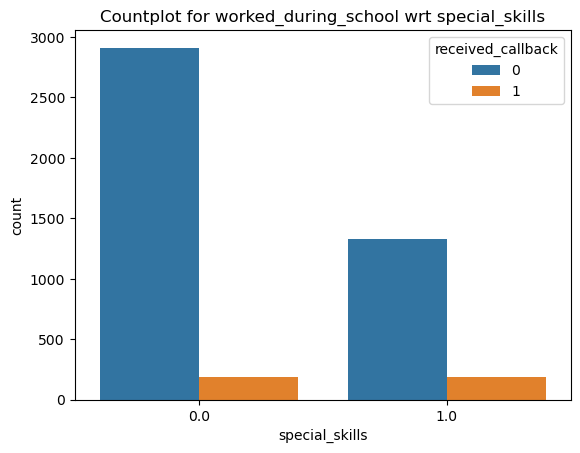

In [72]:
sns.countplot(x=df['special_skills'],hue=df['received_callback'])
plt.title(f'Countplot for worked_during_school wrt special_skills')
plt.savefig('special_skills_received_callback.png')
plt.show()

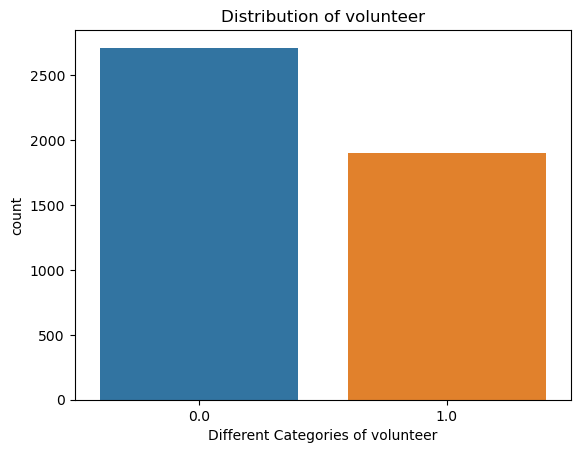

In [73]:
sns.countplot(df['volunteer'])
plt.title('Distribution of volunteer')
plt.xlabel('Different Categories of volunteer')
plt.savefig('volunteer.png')
plt.show()

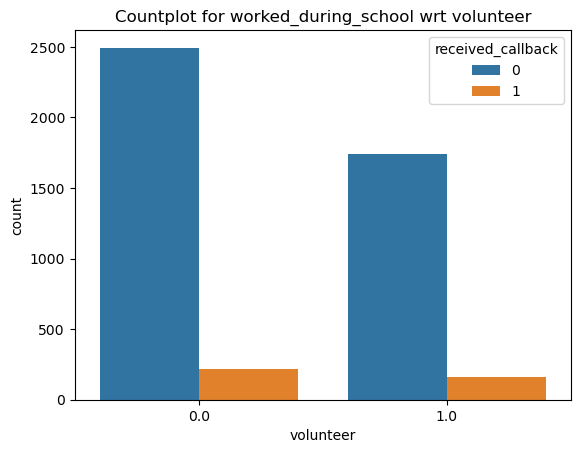

In [74]:
sns.countplot(x=df['volunteer'],hue=df['received_callback'])
plt.title(f'Countplot for worked_during_school wrt volunteer')
plt.savefig('volunteer_received_callback.png')
plt.show()

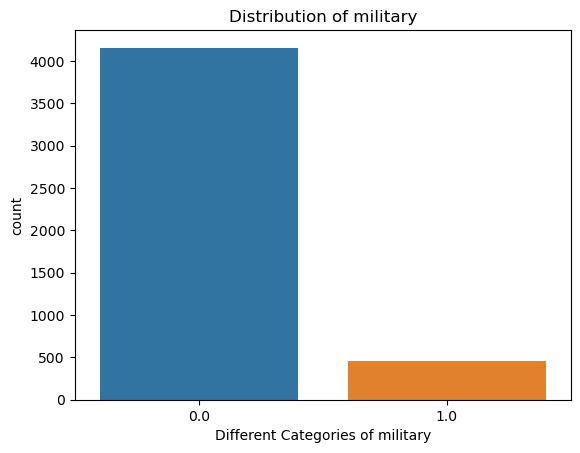

In [75]:
sns.countplot(df['military'])
plt.title('Distribution of military')
plt.xlabel('Different Categories of military')
plt.savefig('military.png')
plt.show()

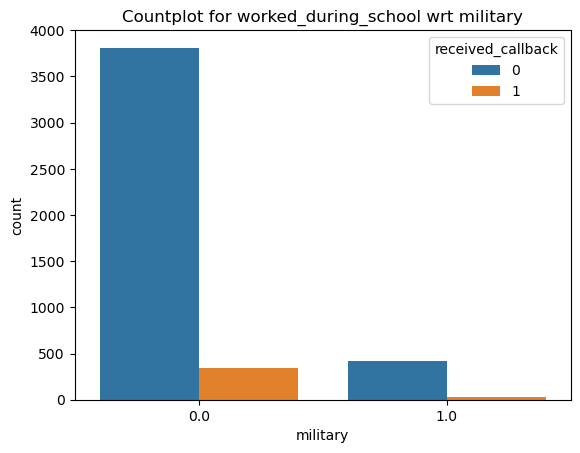

In [76]:
sns.countplot(x=df['military'],hue=df['received_callback'])
plt.title(f'Countplot for worked_during_school wrt military')
plt.savefig('military_received_callback.png')
plt.show()

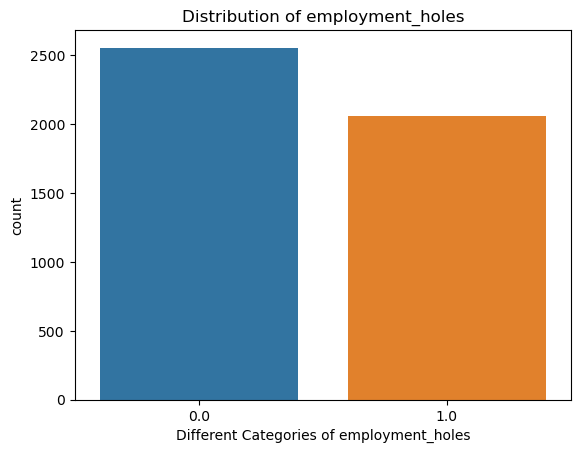

In [77]:
sns.countplot(df['employment_holes'])
plt.title('Distribution of employment_holes')
plt.xlabel('Different Categories of employment_holes')
plt.savefig('employment_holes.png')
plt.show()

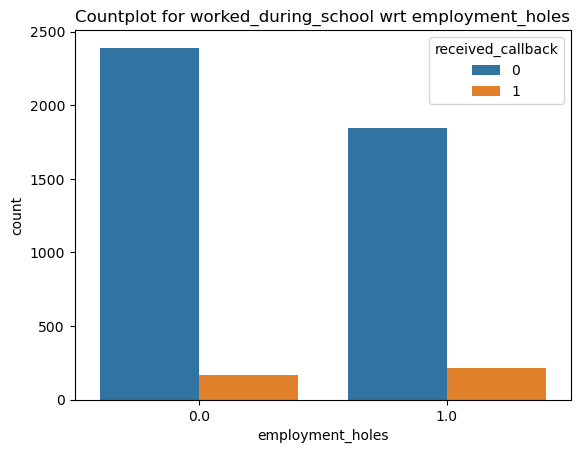

In [78]:
sns.countplot(x=df['employment_holes'],hue=df['received_callback'])
plt.title(f'Countplot for worked_during_school wrt employment_holes')
plt.savefig('employment_holes_received_callback.png')
plt.show()

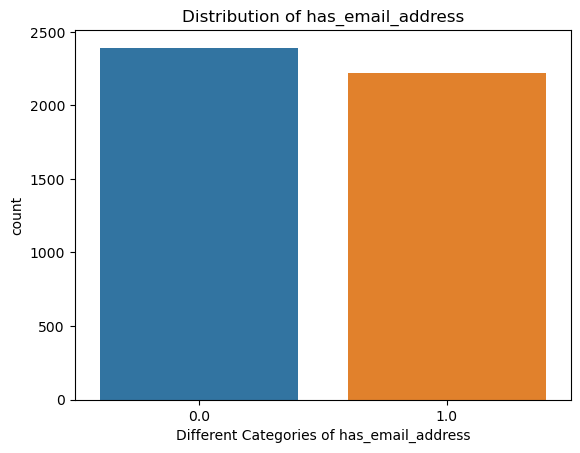

In [79]:
sns.countplot(df['has_email_address'])
plt.title('Distribution of has_email_address')
plt.xlabel('Different Categories of has_email_address')
plt.savefig('has_email_address.png')
plt.show()

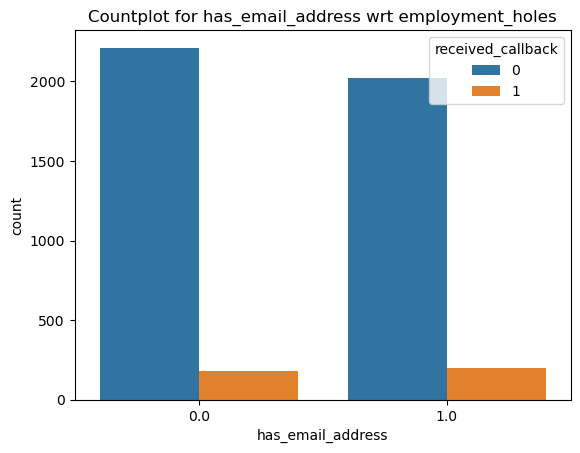

In [80]:
sns.countplot(x=df['has_email_address'],hue=df['received_callback'])
plt.title(f'Countplot for has_email_address wrt employment_holes')
plt.savefig('has_email_address_received_callback.png')
plt.show()

In [81]:
# Inference related to Jobs:
# The dataset is more biased towards not getting call backs.
# There are more jobs available at Chicago than Boston.
# Most of the jobs are listed by 'other services' sector.
# Most of the jobs listed are for secretary job roles.
# Maximum jobs require experience of 1-3 years.
# Most of the jobs doesn't require any specific education.
# Most of the jobs do not require organizational skills.

In [82]:
# Inference related to applicants:
# Most of the applicants that received call did not have school degree.
# White applicants have slightly more chances of selection than black or brown.
# There are more Female applicants than male ones.
# Applicants with high resume quality have more chances of receiving call backs.
# Most of the applicants have completed 4 years college degree.
# Applicants that have worked during school are receving more call back.
# Applicants having computer skills have more chances of getting call back.
# Applicants having special skills have more chances of getting call back.
# Applicants that have carrer gap are receiving more call backs.
# Applicants that have email address have more chances of receiving call backs.

In [83]:
#Multi-variate Analysis

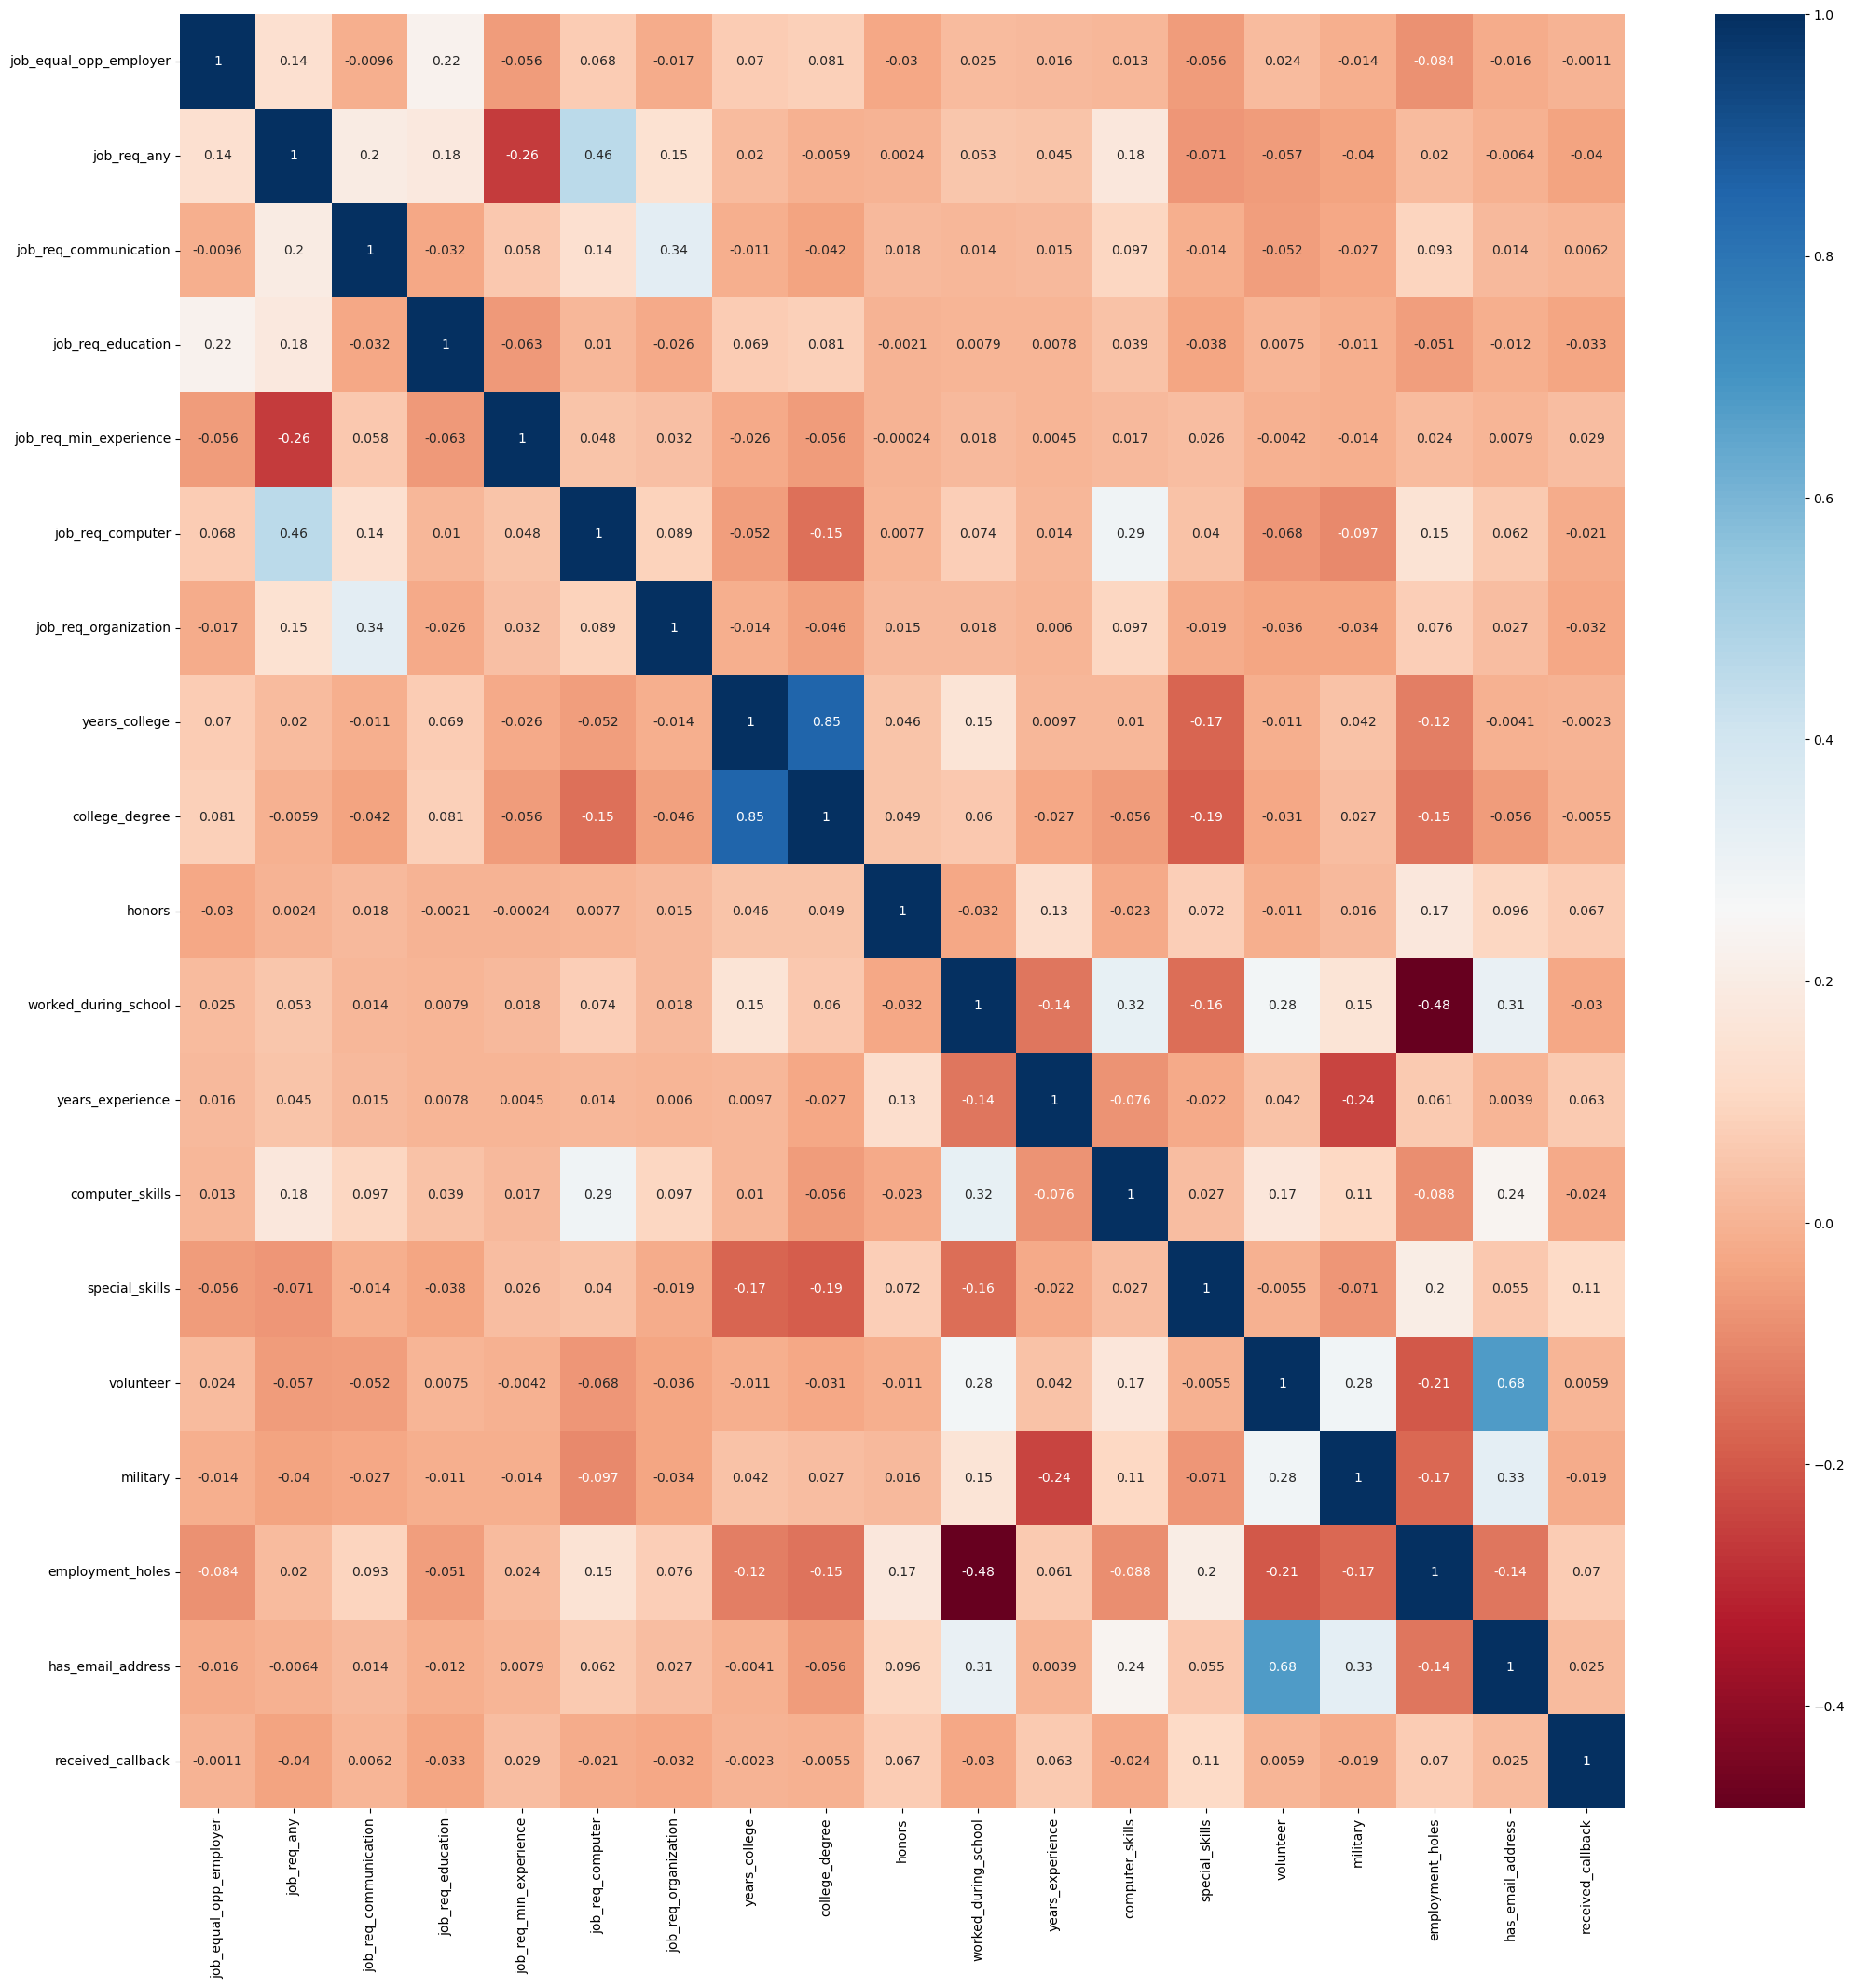

In [84]:
#To display correlation between different columns
corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.savefig('multivariate.png')
plt.show()

In [85]:
# display 'years_experience' value which is much higher.
df[df['years_experience']>30]['years_experience']

1804    44.0
Name: years_experience, dtype: float64

In [86]:
# Removing row which has years_experience as '44' which is nearly impossible.
df = df[df.years_experience != 44]

# Encoding categorical Columns

In [87]:
cat_cols = df.dtypes[df.dtypes=='object'].index
cat_cols

Index(['job_city', 'job_industry', 'job_type', 'job_req_school', 'race',
       'gender', 'resume_quality'],
      dtype='object')

In [88]:
df = pd.get_dummies(df,columns=cat_cols)
print(df.shape)
print(df.dtypes)

(4611, 44)
job_equal_opp_employer                          int64
job_req_any                                     int64
job_req_communication                           int64
job_req_education                               int64
job_req_min_experience                        float64
job_req_computer                              float64
job_req_organization                            int64
years_college                                 float64
college_degree                                float64
honors                                        float64
worked_during_school                          float64
years_experience                              float64
computer_skills                               float64
special_skills                                float64
volunteer                                     float64
military                                      float64
employment_holes                              float64
has_email_address                             float64
received_callback

# Model building

In [89]:
df_no_smote= df.copy()

In [90]:
from imblearn.over_sampling import SMOTE

x = df.drop('received_callback', axis=1)
y = df['received_callback']

smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)

In [91]:
y_resampled.value_counts()

0    4234
1    4234
Name: received_callback, dtype: int64

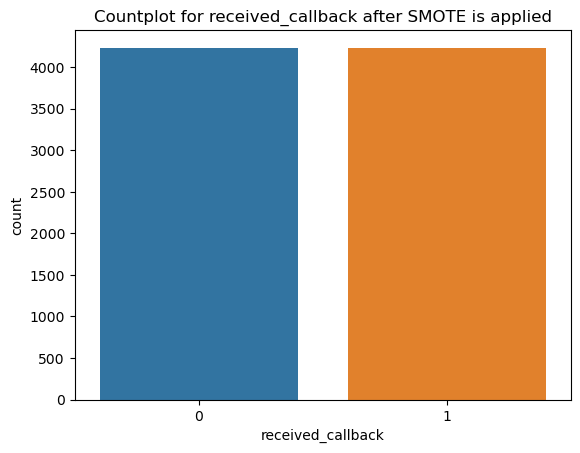

In [92]:
#To display countplot of received_callback after smote is applied
sns.countplot(x=y_resampled)
plt.title('Countplot for received_callback after SMOTE is applied')
plt.savefig('smote_distribution.png')
plt.show()

In [93]:
# Creating Function to evalute the model performance

In [94]:
def eval_model(model,x_train,x_test,y_train,y_test):
    global train_score, test_score, precision, recall, acc, f1

    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    y_pred = model.predict(x_test)

    acc = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print('\nTraining Score is:', round(train_score,4)*100, '%')
    print('Testing Score is:', round(test_score,4)*100, '%\n')

    print('Accuracy_Score is', round(acc,4))
    print('precision Score is:', round(precision,4))
    print('Recall Score is:', round(recall,4))
    print('F1 Score is:', round(f1,4))

    cm = confusion_matrix(y_test,y_pred)
    print('\nConfusion Matrix is\n', cm)

    print('\nPredictions:\n',y_pred)
    print(classification_report(y_test,y_pred))

    plt.figure(figsize = (8,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="RdBu", cbar=False)
    plt.show()

In [95]:
# Creating Function to plot roc curve

In [96]:
def plot_roc_auc(model,y_test,ypred_proba):
    global auc
    fpr,tpr,thresh = roc_curve(y_test,ypred_proba[:,1])
    auc = roc_auc_score(y_test,ypred_proba[:,1])
    print('AUC:',auc)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

In [97]:
# Creating Function to compare performance of all algorithms

In [98]:
score_card = pd.DataFrame(columns=['Model', 'Train Score', 'Test Score', 'AUC Score' , 'Precision Score', 
                                   'Recall Score', 'Accuracy Score', 'f1-score'])

def update_score_card(model_name):
    global score_card
    score_card = score_card.append({'Model': model_name, 'Train Score': train_score, 
                                    'Test Score': test_score,
                                     'AUC Score' : auc,
                                    'Precision Score': precision, 
                                    'Recall Score': recall, 'Accuracy Score': acc, 
                                    'f1-score': f1}, ignore_index = True)
    return(score_card)

In [99]:
#Select the Dependent and Independent Features
x = x_resampled
y = y_resampled
print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(8468, 43) (8468,)


In [100]:
#Split the data into train and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1000)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5927, 43)
(2541, 43)
(5927,)
(2541,)


# Logistic Regression


Training Score is: 93.57 %
Testing Score is: 92.99 %

Accuracy_Score is 0.9299
precision Score is: 0.9965
Recall Score is: 0.8676
F1 Score is: 0.9276

Confusion Matrix is
 [[1223    4]
 [ 174 1140]]

Predictions:
 [0 1 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1227
           1       1.00      0.87      0.93      1314

    accuracy                           0.93      2541
   macro avg       0.94      0.93      0.93      2541
weighted avg       0.94      0.93      0.93      2541



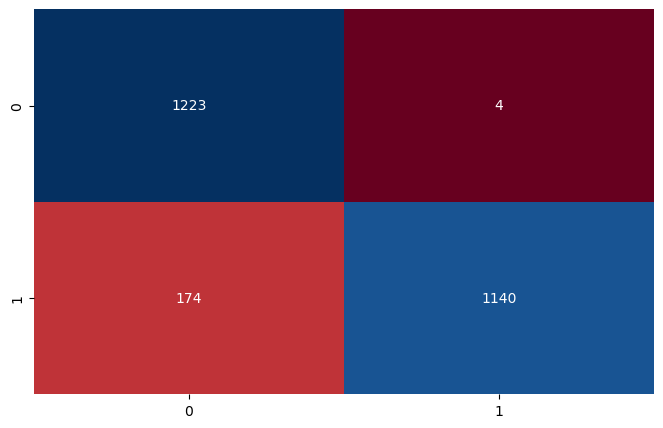

In [101]:
lr = LogisticRegression(max_iter=10000)
eval_model(lr,x_train,x_test,y_train,y_test)

In [102]:
### ROC_AUC Curve

AUC: 0.95675373601823


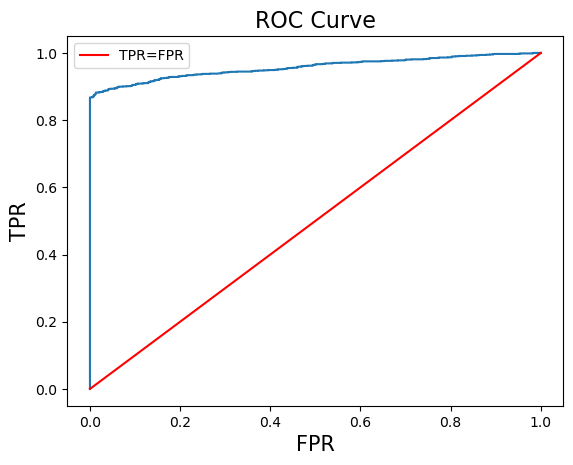

In [103]:
ypred_proba_lr = lr.predict_proba(x_test)
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr,y_test,ypred_proba_lr)

In [104]:
#### Creating tabulated data for evaluation matrix

In [105]:
update_score_card(model_name = 'Logistic Regression')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.86758,0.929949,0.927583


In [106]:
#### Logistic Regression (using SGD)


Training Score is: 93.37 %
Testing Score is: 92.92 %

Accuracy_Score is 0.9292
precision Score is: 0.9905
Recall Score is: 0.8714
F1 Score is: 0.9271

Confusion Matrix is
 [[1216   11]
 [ 169 1145]]

Predictions:
 [0 1 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1227
           1       0.99      0.87      0.93      1314

    accuracy                           0.93      2541
   macro avg       0.93      0.93      0.93      2541
weighted avg       0.94      0.93      0.93      2541



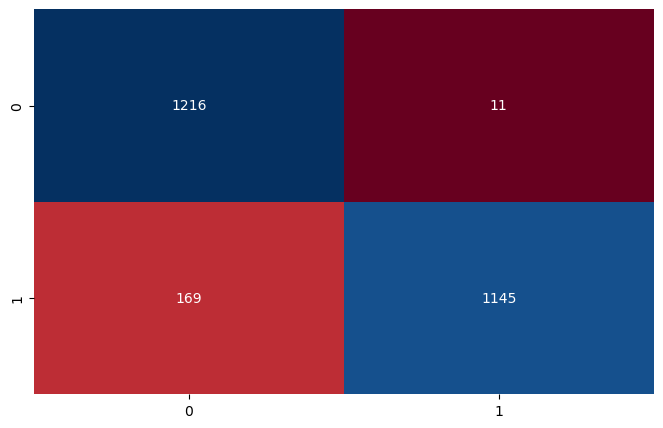

In [107]:
lr_SGD = SGDClassifier(loss = 'log', random_state = 10)
eval_model(lr_SGD,x_train,x_test,y_train,y_test)

AUC: 0.95675373601823


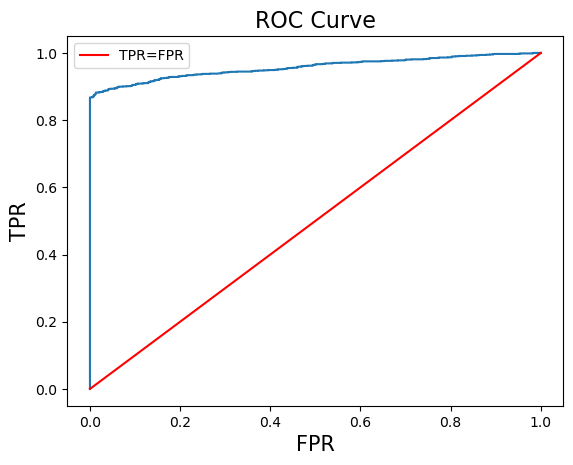

In [108]:
ypred_proba_lr_SGD = lr.predict_proba(x_test)
fpr_lr2,tpr_lr2,thresh_lr2 = plot_roc_auc(lr_SGD,y_test,ypred_proba_lr_SGD)

In [109]:
update_score_card(model_name = 'Logistic Regression using SGD')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126


In [110]:
# Decision Tree Classifier


Training Score is: 99.9 %
Testing Score is: 90.52 %

Accuracy_Score is 0.9052
precision Score is: 0.8995
Recall Score is: 0.9193
F1 Score is: 0.9093

Confusion Matrix is
 [[1092  135]
 [ 106 1208]]

Predictions:
 [0 1 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1227
           1       0.90      0.92      0.91      1314

    accuracy                           0.91      2541
   macro avg       0.91      0.90      0.90      2541
weighted avg       0.91      0.91      0.91      2541



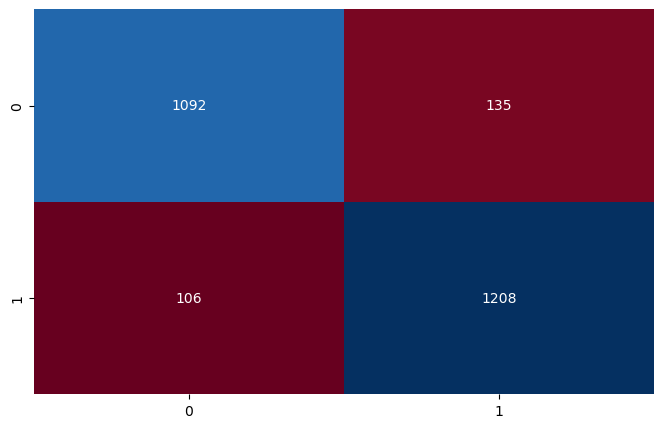

In [111]:
dt1 = DecisionTreeClassifier(criterion='gini')
eval_model(dt1,x_train,x_test,y_train,y_test)

In [112]:
ypred_proba_dt1 = dt1.predict_proba(x_test)

AUC: 0.904488555943826


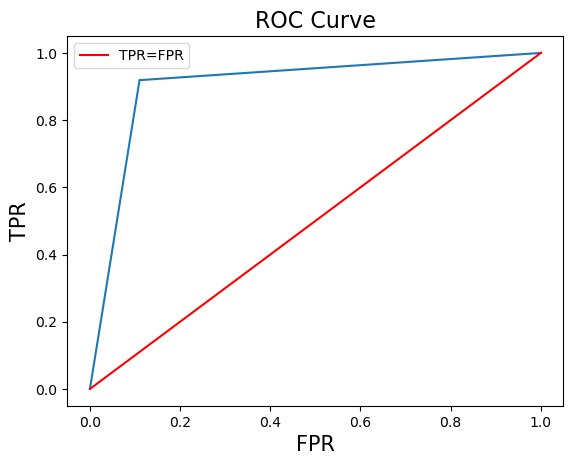

In [113]:
fpr_dt1,tpr_dt1,thresh_dt1 = plot_roc_auc(dt1,y_test,ypred_proba_dt1)

In [114]:
update_score_card(model_name = 'Decision Tree Classifier')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296


In [115]:
# Decision Tree with Pruning

In [116]:
tuned_paramaters = [ {'criterion':['gini','entropy'],'max_depth':[8,9,10,11,12,14],
'min_samples_split':[8,10,12,14,15,16,20]}]

dt_CV= DecisionTreeClassifier(random_state = 10)

grid = GridSearchCV(estimator = dt_CV, param_grid = tuned_paramaters, cv = 10)

dt_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', dt_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 8} 




Training Score is: 96.50999999999999 %
Testing Score is: 90.95 %

Accuracy_Score is 0.9095
precision Score is: 0.9156
Recall Score is: 0.9087
F1 Score is: 0.9121

Confusion Matrix is
 [[1117  110]
 [ 120 1194]]

Predictions:
 [0 1 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1227
           1       0.92      0.91      0.91      1314

    accuracy                           0.91      2541
   macro avg       0.91      0.91      0.91      2541
weighted avg       0.91      0.91      0.91      2541



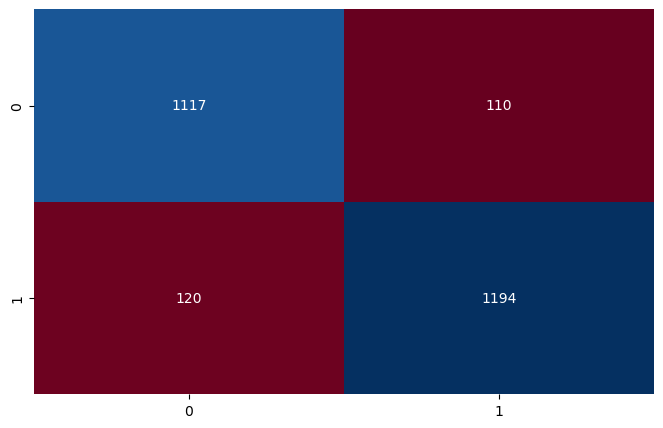

In [117]:
dt2 = DecisionTreeClassifier(criterion='entropy',max_depth=14, min_samples_split=10)
eval_model(dt2,x_train,x_test,y_train,y_test)

In [118]:
ypred_proba_dt2 = dt2.predict_proba(x_test)

AUC: 0.9344312829425199


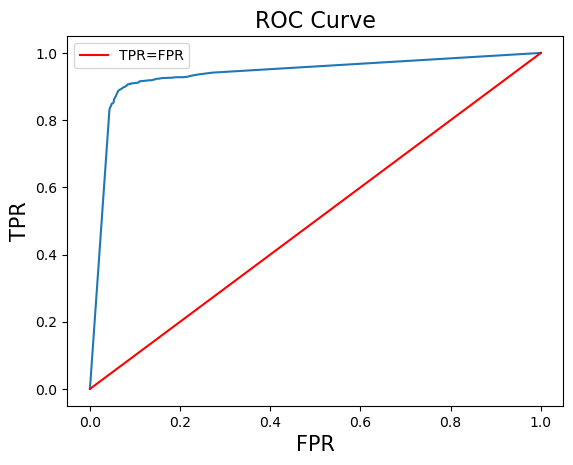

In [119]:
fpr_dt2,tpr_dt2,thresh_dt2 = plot_roc_auc(dt2,y_test,ypred_proba_dt2)

In [120]:
update_score_card(model_name = 'Decision Tree with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147


In [121]:
# Ensemble Learning

In [122]:
# Bagging Classifier


Training Score is: 99.26 %
Testing Score is: 93.89999999999999 %

Accuracy_Score is 0.939
precision Score is: 0.964
Recall Score is: 0.9163
F1 Score is: 0.9395

Confusion Matrix is
 [[1182   45]
 [ 110 1204]]

Predictions:
 [0 1 0 ... 0 1 1]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1227
           1       0.96      0.92      0.94      1314

    accuracy                           0.94      2541
   macro avg       0.94      0.94      0.94      2541
weighted avg       0.94      0.94      0.94      2541



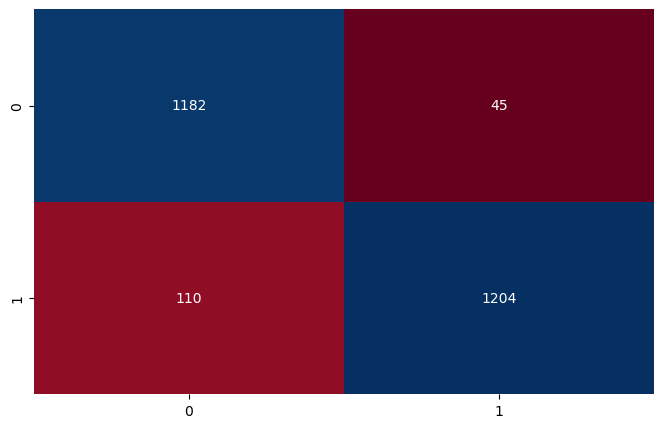

In [123]:
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(bag,x_train,x_test,y_train,y_test)

In [124]:
ypred_proba_bag = bag.predict_proba(x_test)

AUC: 0.9714199412260167


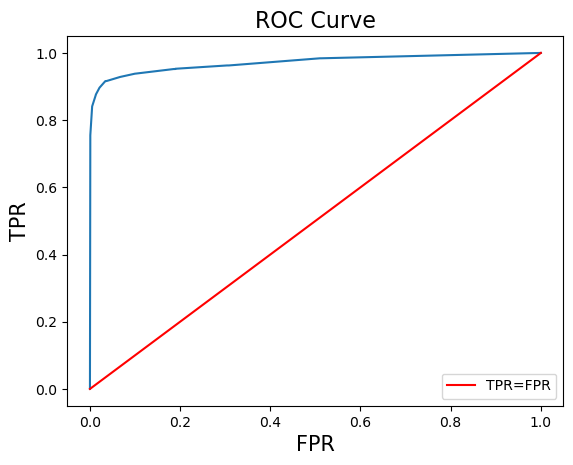

In [125]:
fpr_bag,tpr_bag,thresh_bag = plot_roc_auc(bag,y_test,ypred_proba_bag)

In [126]:
update_score_card(model_name = 'Bagging Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524


In [127]:
# AdaBoost Classifier


Training Score is: 99.9 %
Testing Score is: 93.55 %

Accuracy_Score is 0.9355
precision Score is: 0.9513
Recall Score is: 0.9224
F1 Score is: 0.9366

Confusion Matrix is
 [[1165   62]
 [ 102 1212]]

Predictions:
 [0 1 0 ... 0 1 1]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1227
           1       0.95      0.92      0.94      1314

    accuracy                           0.94      2541
   macro avg       0.94      0.94      0.94      2541
weighted avg       0.94      0.94      0.94      2541



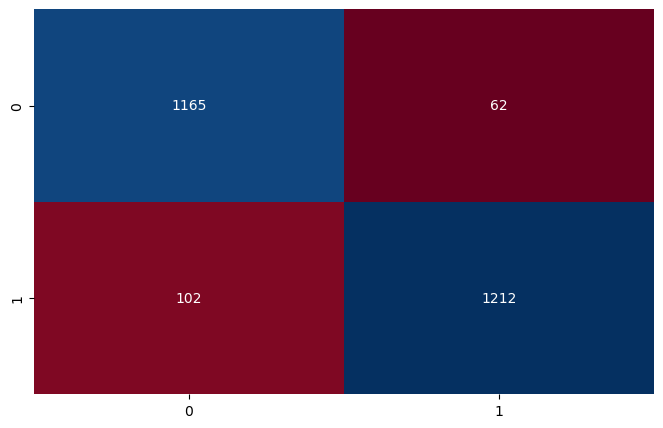

In [128]:
adaboost = AdaBoostClassifier(tree.DecisionTreeClassifier(random_state=10))
eval_model(adaboost,x_train,x_test,y_train,y_test)

In [129]:
ypred_proba_adaboost = adaboost.predict_proba(x_test)

AUC: 0.9657890884822592


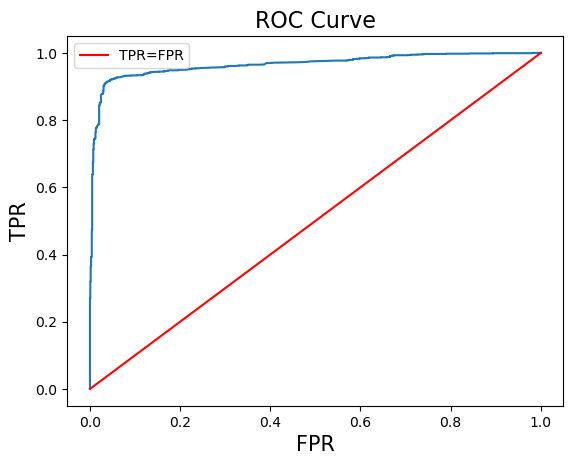

In [130]:
fpr_adaboost,tpr_adaboost,thresh_adaboost = plot_roc_auc(adaboost,y_test,ypred_proba_adaboost)

In [131]:
update_score_card(model_name = 'Adaboost Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631


In [132]:
# XGBoost Classifier


Training Score is: 90.89 %
Testing Score is: 89.02 %

Accuracy_Score is 0.8902
precision Score is: 0.9543
Recall Score is: 0.8272
F1 Score is: 0.8863

Confusion Matrix is
 [[1175   52]
 [ 227 1087]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      1227
           1       0.95      0.83      0.89      1314

    accuracy                           0.89      2541
   macro avg       0.90      0.89      0.89      2541
weighted avg       0.90      0.89      0.89      2541



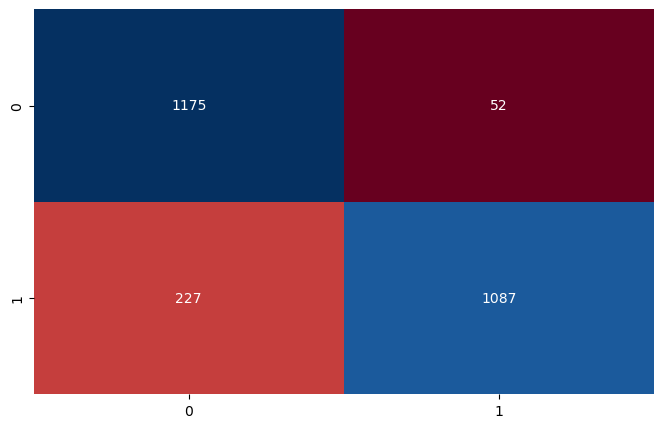

In [133]:
xgbm = XGBClassifier(random_state=1,learning_rate=0.01)
eval_model(xgbm,x_train,x_test,y_train,y_test)

In [134]:
ypred_proba_xgbm = xgbm.predict_proba(x_test)

AUC: 0.9549386023998343


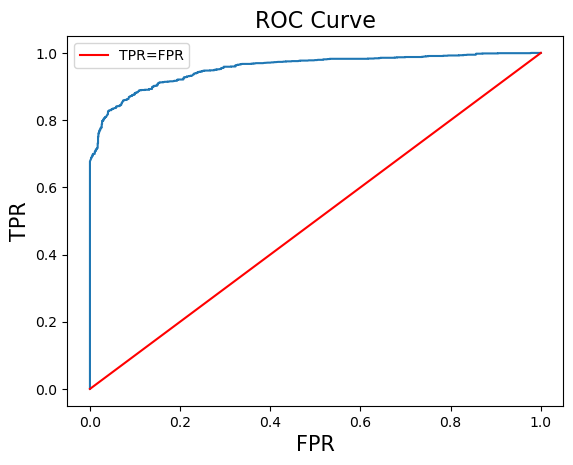

In [135]:
fpr_xgbm,tpr_xgbm,thresh_xgbm = plot_roc_auc(xgbm,y_test,ypred_proba_xgbm)

In [136]:
update_score_card(model_name = 'XG Boost Ensemble')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262


In [137]:
# Random Forest Classifier


Training Score is: 99.9 %
Testing Score is: 95.43 %

Accuracy_Score is 0.9543
precision Score is: 0.9823
Recall Score is: 0.9285
F1 Score is: 0.9546

Confusion Matrix is
 [[1205   22]
 [  94 1220]]

Predictions:
 [0 1 0 ... 0 0 1]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1227
           1       0.98      0.93      0.95      1314

    accuracy                           0.95      2541
   macro avg       0.95      0.96      0.95      2541
weighted avg       0.96      0.95      0.95      2541



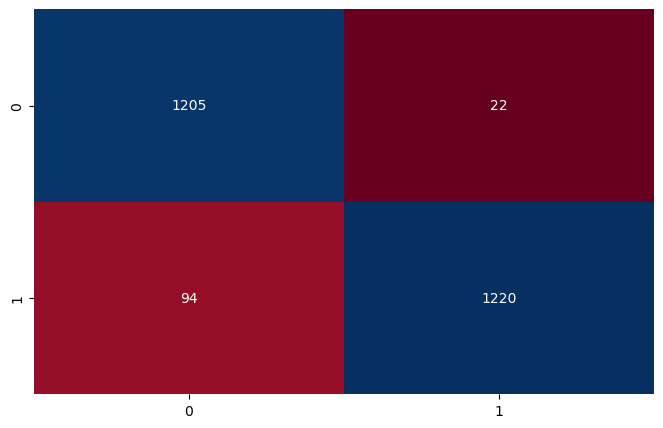

In [138]:
rf = RandomForestClassifier(n_estimators=100, random_state=10)
eval_model(rf,x_train,x_test,y_train,y_test)

In [139]:
ypred_proba_rf = rf.predict_proba(x_test)

AUC: 0.9837397768871127


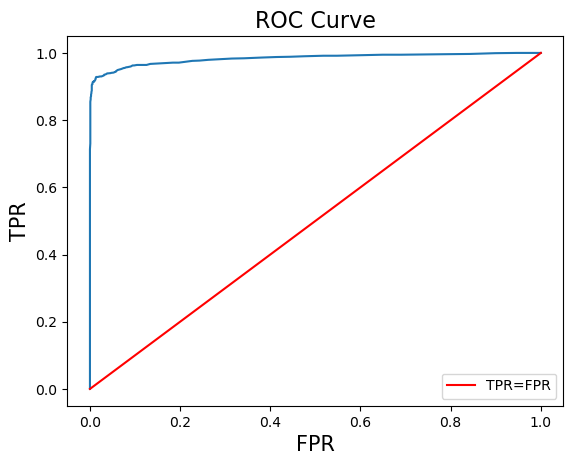

In [140]:
fpr_rf,tpr_rf,thresh_rf = plot_roc_auc(rf,y_test,ypred_proba_rf)

In [141]:
update_score_card(model_name = 'Random Forest')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617


In [142]:
# Random Forest with GridSearchCV

In [143]:
tuned_paramaters = [{'n_estimators': [75, 100],
                     'min_samples_split': [12,20], 
                     'max_depth': [7, 10], 
                     'min_samples_leaf': [4,10], 
                     'max_leaf_nodes': [9, 15] }]

rf_CV= RandomForestClassifier(random_state = 10)

grid = GridSearchCV(estimator = rf_CV, param_grid = tuned_paramaters, cv = 10)

rf_grid = grid.fit(x_train, y_train)

print('Best parameters for random forest Classifier: ', rf_grid.best_params_, '\n')

Best parameters for random forest Classifier:  {'max_depth': 10, 'max_leaf_nodes': 15, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100} 




Training Score is: 86.0 %
Testing Score is: 84.49 %

Accuracy_Score is 0.8449
precision Score is: 0.8979
Recall Score is: 0.79
F1 Score is: 0.8405

Confusion Matrix is
 [[1109  118]
 [ 276 1038]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1227
           1       0.90      0.79      0.84      1314

    accuracy                           0.84      2541
   macro avg       0.85      0.85      0.84      2541
weighted avg       0.85      0.84      0.84      2541



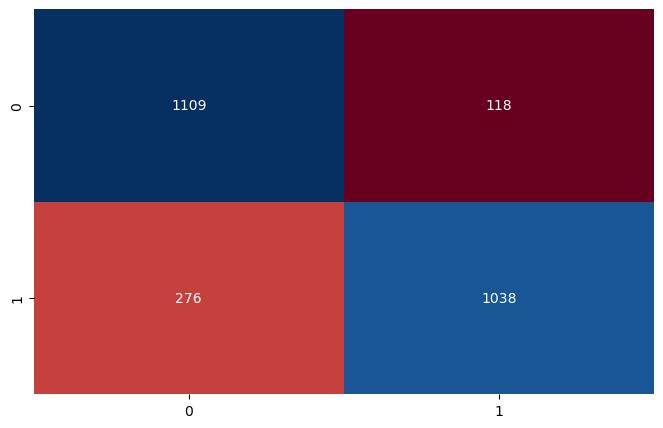

In [144]:
rf2 = RandomForestClassifier(max_depth=10, 
                            max_leaf_nodes=15, 
                            min_samples_leaf=4,
                            min_samples_split=12,
                            n_estimators=100)
eval_model(rf2,x_train,x_test,y_train,y_test)

In [145]:
ypred_proba_rf2 = rf2.predict_proba(x_test)

AUC: 0.9185047491809726


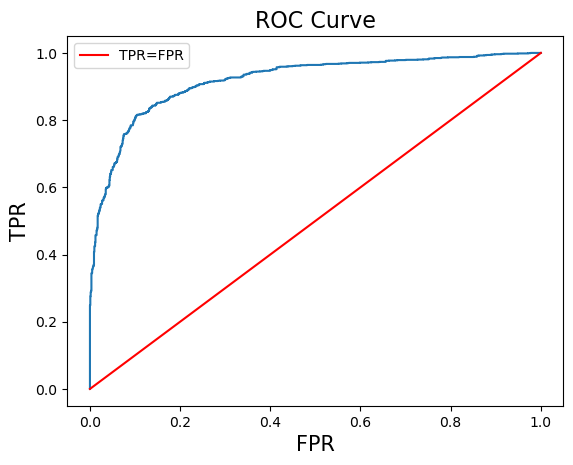

In [146]:
fpr_rf2,tpr_rf2,thresh_rf2 = plot_roc_auc(rf2,y_test,ypred_proba_rf2)


In [147]:
update_score_card(model_name = 'Random Forest with Pruning')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486


In [148]:
# Naive Bayes Classifier


Training Score is: 66.69 %
Testing Score is: 66.67 %

Accuracy_Score is 0.6667
precision Score is: 0.6187
Recall Score is: 0.9262
F1 Score is: 0.7418

Confusion Matrix is
 [[ 477  750]
 [  97 1217]]

Predictions:
 [0 1 1 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.83      0.39      0.53      1227
           1       0.62      0.93      0.74      1314

    accuracy                           0.67      2541
   macro avg       0.72      0.66      0.64      2541
weighted avg       0.72      0.67      0.64      2541



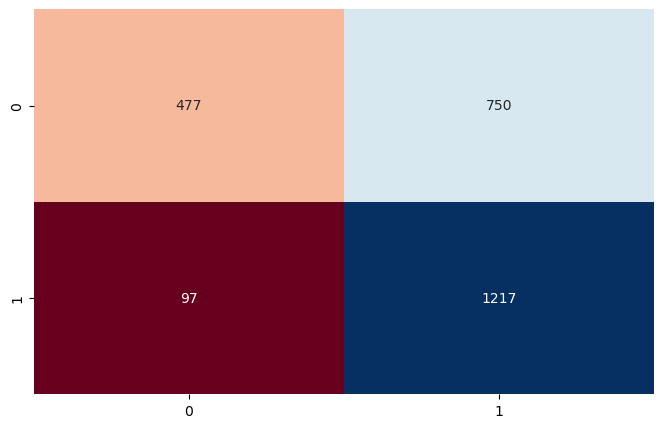

In [149]:
gnb = GaussianNB()
eval_model(gnb,x_train,x_test,y_train,y_test)

AUC: 0.8339790036209637


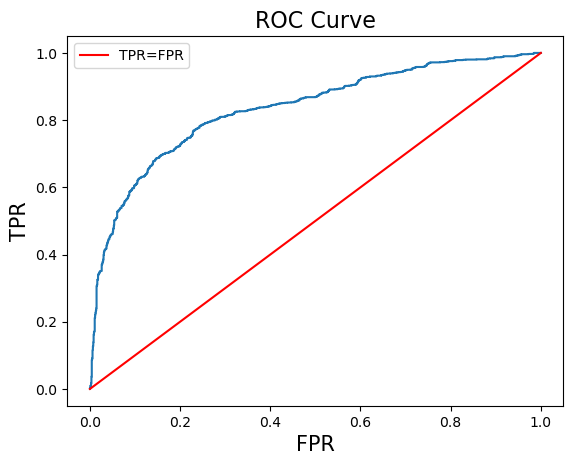

In [150]:
ypred_proba_gnb = gnb.predict_proba(x_test)

fpr_gnb,tpr_gnb,thresh_gnb = plot_roc_auc(gnb,y_test,ypred_proba_gnb)

In [151]:
update_score_card(model_name = 'Naive Bayes Classifier')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486
9,Naive Bayes Classifier,0.666948,0.666667,0.833979,0.618709,0.926180,0.666667,0.741847


In [152]:
# KNN Classifier


Training Score is: 85.71 %
Testing Score is: 81.58 %

Accuracy_Score is 0.8158
precision Score is: 0.7442
Recall Score is: 0.981
F1 Score is: 0.8464

Confusion Matrix is
 [[ 784  443]
 [  25 1289]]

Predictions:
 [1 1 1 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.97      0.64      0.77      1227
           1       0.74      0.98      0.85      1314

    accuracy                           0.82      2541
   macro avg       0.86      0.81      0.81      2541
weighted avg       0.85      0.82      0.81      2541



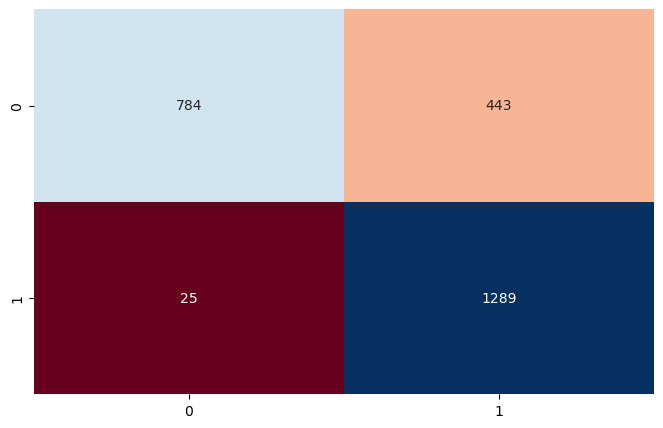

In [153]:
knn1 = KNeighborsClassifier(n_neighbors=9)
eval_model(knn1,x_train,x_test,y_train,y_test)

AUC: 0.945893946329355


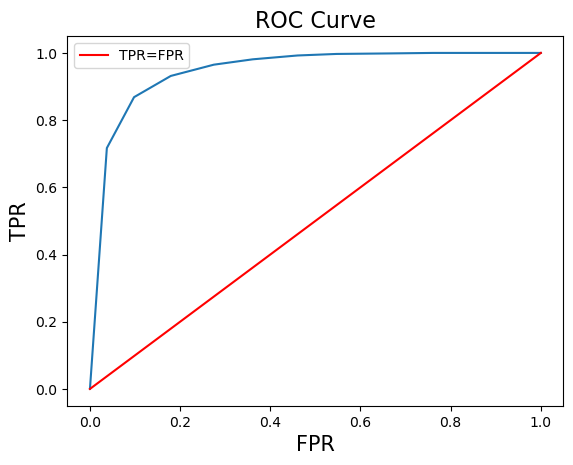

In [154]:
ypred_proba_knn1 = knn1.predict_proba(x_test)

fpr_knn1,tpr_knn1,thresh_knn1 = plot_roc_auc(knn1,y_test,ypred_proba_knn1)

In [155]:
update_score_card(model_name = 'KNN')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486
9,Naive Bayes Classifier,0.666948,0.666667,0.833979,0.618709,0.926180,0.666667,0.741847


In [156]:
# To find optimal number of neighbors for KNN

In [157]:
neighbors = list(range(3,51,2))
knn_acc = []
for i in neighbors:
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(x_train,y_train)
    ypred = m.predict(x_test)
    knn_acc.append(accuracy_score(y_test,ypred))

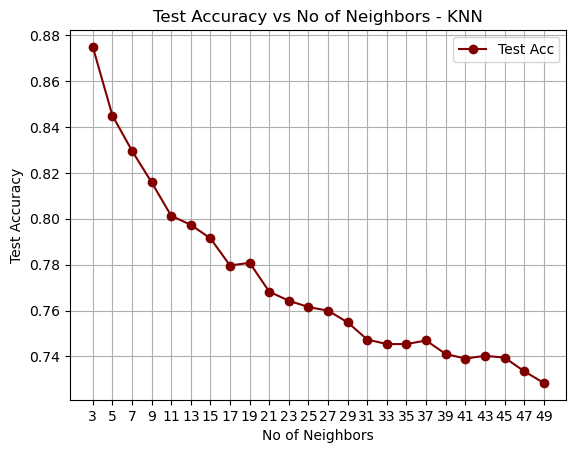

In [158]:
plt.plot(neighbors,knn_acc,color='maroon',label='Test Acc',marker='o')
plt.title('Test Accuracy vs No of Neighbors - KNN')
plt.xlabel('No of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.show()


Training Score is: 93.94 %
Testing Score is: 87.49 %

Accuracy_Score is 0.8749
precision Score is: 0.8144
Recall Score is: 0.9817
F1 Score is: 0.8903

Confusion Matrix is
 [[ 933  294]
 [  24 1290]]

Predictions:
 [0 1 1 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.97      0.76      0.85      1227
           1       0.81      0.98      0.89      1314

    accuracy                           0.87      2541
   macro avg       0.89      0.87      0.87      2541
weighted avg       0.89      0.87      0.87      2541



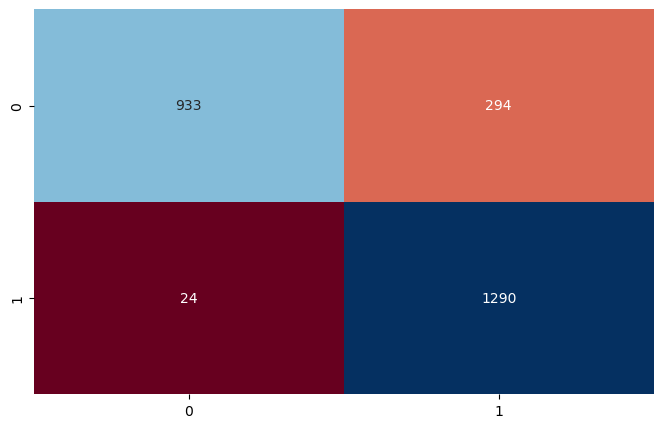

In [159]:
knn2 = KNeighborsClassifier(n_neighbors=3)
eval_model(knn2,x_train,x_test,y_train,y_test)

AUC: 0.941504504806243


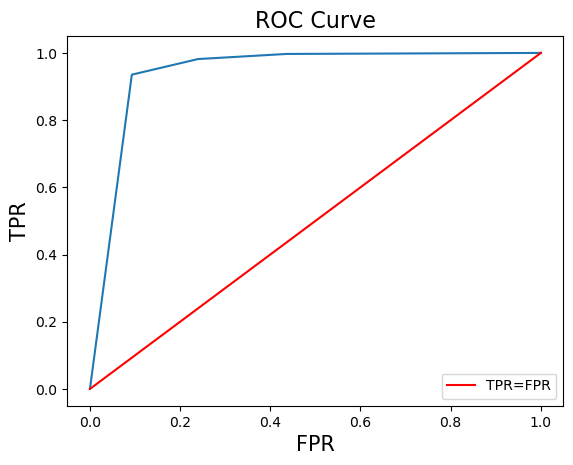

In [160]:
ypred_proba_knn2 = knn2.predict_proba(x_test)

fpr_knn2,tpr_knn2,thresh_knn2 = plot_roc_auc(knn2,y_test,ypred_proba_knn2)

In [161]:
update_score_card(model_name = 'KNN with tuned parameters')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486
9,Naive Bayes Classifier,0.666948,0.666667,0.833979,0.618709,0.926180,0.666667,0.741847


In [162]:
# Support Vector Classifier

In [163]:
# SVM using linear kernel


Training Score is: 93.62 %
Testing Score is: 93.23 %

Accuracy_Score is 0.9323
precision Score is: 1.0
Recall Score is: 0.8691
F1 Score is: 0.93

Confusion Matrix is
 [[1227    0]
 [ 172 1142]]

Predictions:
 [0 1 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1227
           1       1.00      0.87      0.93      1314

    accuracy                           0.93      2541
   macro avg       0.94      0.93      0.93      2541
weighted avg       0.94      0.93      0.93      2541



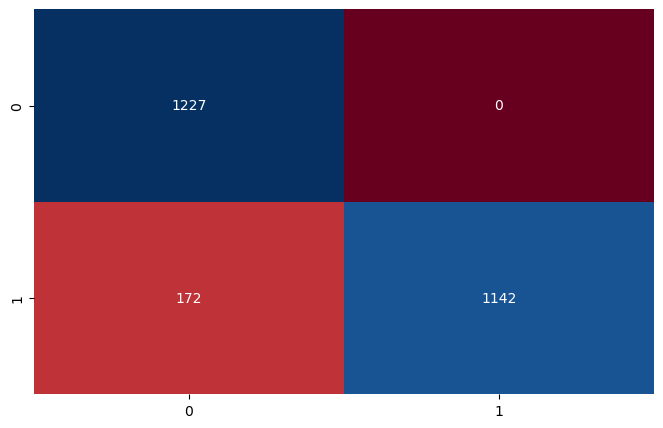

In [164]:
sv1= SVC(kernel='linear')
eval_model(sv1,x_train,x_test,y_train,y_test)

In [165]:
update_score_card(model_name = 'Support Vector using Linear kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486
9,Naive Bayes Classifier,0.666948,0.666667,0.833979,0.618709,0.926180,0.666667,0.741847


In [166]:
# SVM using Gaussian kernel


Training Score is: 91.34 %
Testing Score is: 90.03999999999999 %

Accuracy_Score is 0.9004
precision Score is: 0.9863
Recall Score is: 0.8189
F1 Score is: 0.8948

Confusion Matrix is
 [[1212   15]
 [ 238 1076]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1227
           1       0.99      0.82      0.89      1314

    accuracy                           0.90      2541
   macro avg       0.91      0.90      0.90      2541
weighted avg       0.91      0.90      0.90      2541



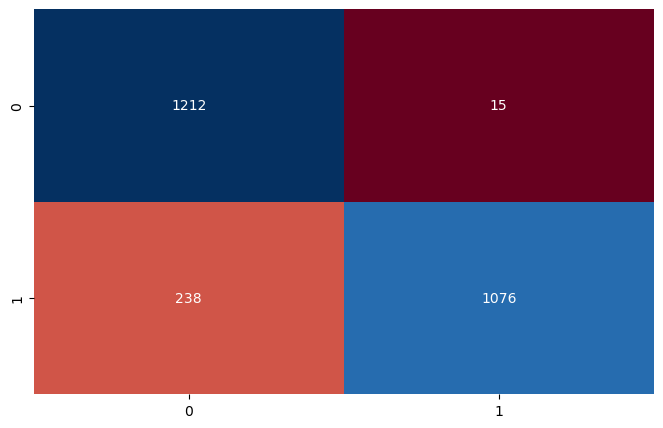

In [167]:
sv_gaussian= SVC(kernel='rbf')
eval_model(sv_gaussian,x_train,x_test,y_train,y_test)

In [168]:
update_score_card(model_name = 'Support Vector using Gaussian kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486
9,Naive Bayes Classifier,0.666948,0.666667,0.833979,0.618709,0.926180,0.666667,0.741847


In [169]:
# SVM using Sigmoid kernel


Training Score is: 48.089999999999996 %
Testing Score is: 49.59 %

Accuracy_Score is 0.4959
precision Score is: 0.5134
Recall Score is: 0.481
F1 Score is: 0.4967

Confusion Matrix is
 [[628 599]
 [682 632]]

Predictions:
 [1 1 1 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.48      0.51      0.50      1227
           1       0.51      0.48      0.50      1314

    accuracy                           0.50      2541
   macro avg       0.50      0.50      0.50      2541
weighted avg       0.50      0.50      0.50      2541



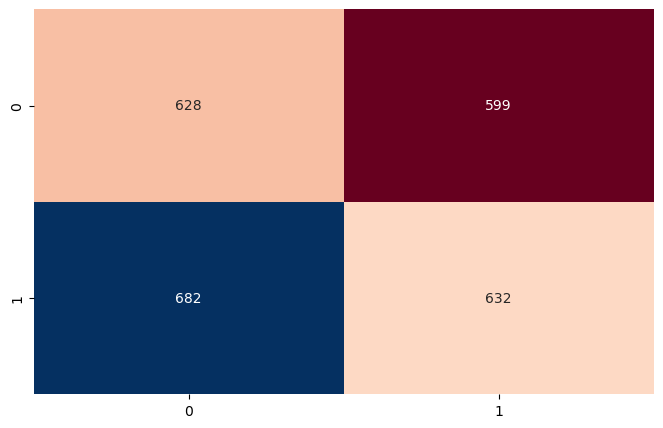

In [170]:
sv_sigmoid= SVC(kernel='sigmoid')
eval_model(sv_sigmoid,x_train,x_test,y_train,y_test)

In [171]:
update_score_card(model_name = 'Support Vector using Sigmoid kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486
9,Naive Bayes Classifier,0.666948,0.666667,0.833979,0.618709,0.926180,0.666667,0.741847


In [172]:
# SVM using Polynomial kernel


Training Score is: 87.13 %
Testing Score is: 85.16 %

Accuracy_Score is 0.8516
precision Score is: 0.9845
Recall Score is: 0.7245
F1 Score is: 0.8347

Confusion Matrix is
 [[1212   15]
 [ 362  952]]

Predictions:
 [0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.77      0.99      0.87      1227
           1       0.98      0.72      0.83      1314

    accuracy                           0.85      2541
   macro avg       0.88      0.86      0.85      2541
weighted avg       0.88      0.85      0.85      2541



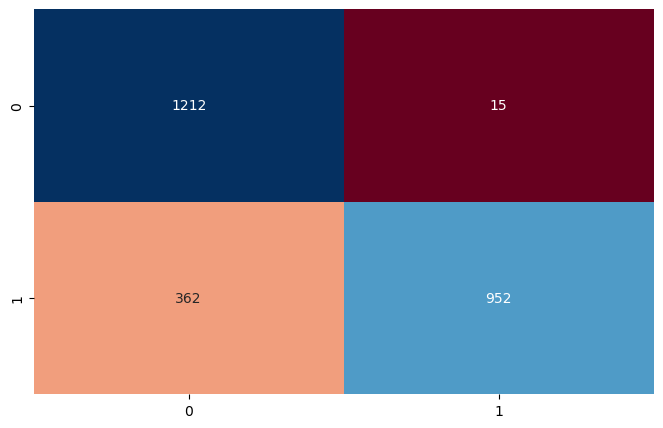

In [173]:
sv_poly= SVC(kernel='poly')
eval_model(sv_poly,x_train,x_test,y_train,y_test)

In [174]:
update_score_card(model_name = 'Support Vector using Polynomial kernel')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486
9,Naive Bayes Classifier,0.666948,0.666667,0.833979,0.618709,0.926180,0.666667,0.741847


In [175]:
# SVM using using GridSearchCV

In [176]:
tuned_paramaters = [{ 'degree': [2, 4], 'gamma' : ['auto','scale' ], 'C': [0.5, 1] }]

svm_CV= SVC(random_state = 10)

grid = GridSearchCV(estimator=svm_CV , param_grid=tuned_paramaters, scoring='accuracy', cv= 5)

svm_grid = grid.fit(x_train, y_train)

print('Best parameters for Decision Tree Classifier: ', svm_grid.best_params_, '\n')

Best parameters for Decision Tree Classifier:  {'C': 1, 'degree': 2, 'gamma': 'auto'} 




Training Score is: 93.62 %
Testing Score is: 93.23 %

Accuracy_Score is 0.9323
precision Score is: 1.0
Recall Score is: 0.8691
F1 Score is: 0.93

Confusion Matrix is
 [[1227    0]
 [ 172 1142]]

Predictions:
 [0 1 0 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1227
           1       1.00      0.87      0.93      1314

    accuracy                           0.93      2541
   macro avg       0.94      0.93      0.93      2541
weighted avg       0.94      0.93      0.93      2541



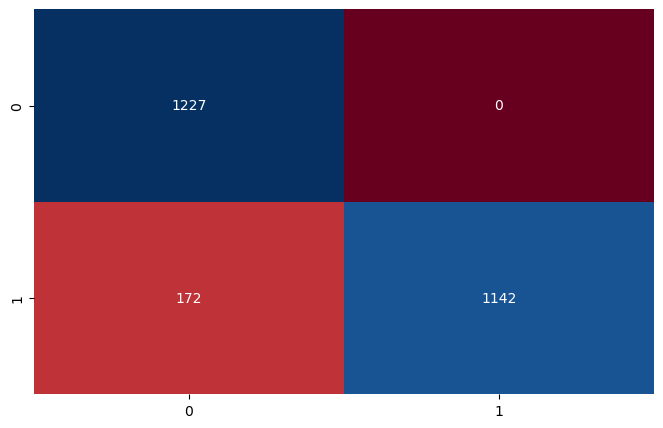

In [177]:
sv_poly_cv= SVC(kernel='linear', C=1, degree=2, gamma='auto')
eval_model(sv_poly_cv,x_train,x_test,y_train,y_test)

In [178]:
update_score_card(model_name = 'Support Vector Polynomial with Grid search CV')

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486
9,Naive Bayes Classifier,0.666948,0.666667,0.833979,0.618709,0.926180,0.666667,0.741847


In [179]:
# Model Comparision

In [180]:
score_card

,Model,Train Score,Test Score,AUC Score,Precision Score,Recall Score,Accuracy Score,f1-score
0,Logistic Regression,0.935718,0.929949,0.956754,0.996503,0.867580,0.929949,0.927583
1,Logistic Regression using SGD,0.933693,0.929162,0.956754,0.990484,0.871385,0.929162,0.927126
2,Decision Tree Classifier,0.998988,0.905155,0.904489,0.899479,0.919330,0.905155,0.909296
3,Decision Tree with Pruning,0.965075,0.909484,0.934431,0.915644,0.908676,0.909484,0.912147
4,Bagging Ensemble,0.992576,0.939000,0.971420,0.963971,0.916286,0.939000,0.939524
5,Adaboost Ensemble,0.998988,0.935458,0.965789,0.951334,0.922374,0.935458,0.936631
6,XG Boost Ensemble,0.908892,0.890201,0.954939,0.954346,0.827245,0.890201,0.886262
7,Random Forest,0.998988,0.954349,0.983740,0.982287,0.928463,0.954349,0.954617
8,Random Forest with Pruning,0.859963,0.844943,0.918505,0.897924,0.789954,0.844943,0.840486
9,Naive Bayes Classifier,0.666948,0.666667,0.833979,0.618709,0.926180,0.666667,0.741847


In [181]:
import dataframe_image as dfi
dfi.export(score_card, 'score_card.png')

In [182]:
score_card['f1-score'].idxmax()

7

In [183]:
score_card.iloc[score_card['f1-score'].idxmax()]

Model              Random Forest
Train Score             0.998988
Test Score              0.954349
AUC Score                0.98374
Precision Score         0.982287
Recall Score            0.928463
Accuracy Score          0.954349
f1-score                0.954617
Name: 7, dtype: object

In [184]:
print (score_card['Model'][score_card['f1-score'].idxmax()], "is the best performing model")

Random Forest is the best performing model
